In [86]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import chi2_contingency
#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

# Importing the datasets

In [87]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/sample_submission.csv')
sample_submission.head()

,encounter_id,readmitted_binary
0,499502,No
1,447319,No
2,309126,Yes
3,181183,Yes
4,359339,No


In [88]:
test = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/test.csv', na_values=['?', ''], index_col='encounter_id')
test.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,USA,103232799,Caucasian,Male,[80-90),NaN,HM,0,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
447319,USA,93395304,Caucasian,Male,[20-30),NaN,HM,0,0,1,...,7,250.13,70,794,7,>300,NaN,No,No,[]
309126,USA,6281586,AfricanAmerican,Male,[30-40),NaN,NaN,0,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
181183,USA,67381308,Caucasian,Male,[50-60),NaN,BC,0,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
359339,USA,71670204,Caucasian,Male,[60-70),NaN,NaN,0,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [89]:
train = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/train.csv', na_values=['?', ''], index_col='encounter_id')
train.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,2,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,1,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,1,...,562,455,5,NaN,NaN,No,No,[],No,No
654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [90]:
train.drop(['country','weight'], axis=1, inplace=True)

In [91]:
train.isna().sum()

patient_id                                   0
race                                      5070
gender                                       0
age                                       3557
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_diagnosis                        262
additional_diagnosis                      1008
number_diagnoses                             0
glucose_test_

In [92]:
train['race'].fillna('Unknown', inplace=True)
train['medical_specialty'].fillna('Unknown', inplace=True)
train['admission_source'].fillna('Unknown', inplace=True)
train['payer_code'].fillna('None', inplace=True)
train['glucose_test_result'].fillna('None', inplace=True)
train['a1c_test_result'].fillna('None', inplace=True)
train['admission_type'].fillna('Unknown', inplace=True)
train['age'].fillna('Unknown', inplace=True)
train['discharge_disposition'].fillna('Unknown', inplace=True)
train['primary_diagnosis'].fillna('Unknown', inplace=True)
train['secondary_diagnosis'].fillna('Unknown', inplace=True)
train['additional_diagnosis'].fillna('Unknown', inplace=True)

In [93]:
train.isna().sum()

patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_m

In [94]:
new_column_names = {'outpatient_visits_in_previous_year': 'outpatient_visits', 
                    'emergency_visits_in_previous_year': 'emergency_visits',
                    'inpatient_visits_in_previous_year': 'inpatient_visits',
                    'change_in_meds_during_hospitalization': 'change_in_meds',
                    'length_of_stay_in_hospital': 'length_of_stay',
                    'prescribed_diabetes_meds': 'diabetes_meds'
                   }
train = train.rename(columns=new_column_names)

In [95]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins=True)
    categories = cont_tab.index[:-1]
    fig = plt.figure(figsize=(50, 10))
    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
 
    #Rotacionar os rótulos do eixo x
    plt.xticks(rotation=45, ha="right")
 
    plt.show()

In [96]:
train['race'].value_counts()

race
Caucasian          50693
AfricanAmerican    12693
Unknown             5070
Hispanic            1364
Other                995
Asian                421
Name: count, dtype: int64

In [97]:
len(train[train['race']== '94306932'])

0

In [98]:
unknown = train[train['race']== 'Unknown']['patient_id'].unique()
train[train['patient_id'].isin(unknown)]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
727104,94306932,Caucasian,Male,[70-80),SP,0,0,0,Urgent,Hematology,...,157,197,9,None,None,No,No,[],No,>30 days
992230,57344247,Unknown,Male,[80-90),MC,0,0,0,Elective,Orthopedics,...,715,250,8,None,None,Ch,Yes,['insulin'],No,No
353655,28219392,Unknown,Female,[60-70),MC,1,0,0,Urgent,InternalMedicine,...,E935,197,9,None,None,No,Yes,['glyburide'],No,No
911403,88363836,Unknown,Female,[60-70),MC,0,0,0,Emergency,Unknown,...,414,401,9,None,>8,No,No,[],No,No
811707,23388138,Caucasian,Female,[70-80),None,1,1,0,Not Available,Family/GeneralPractice,...,473,250.4,5,Norm,None,Ch,Yes,['insulin'],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631812,23213772,Unknown,Female,[70-80),MC,0,0,1,Elective,InternalMedicine,...,357,787,7,None,None,Ch,Yes,"['metformin', 'glimepiride']",No,No
714110,38516562,Unknown,Male,[80-90),MC,0,0,0,Emergency,Unknown,...,496,250,5,None,None,No,No,[],No,>30 days
398947,59167503,Unknown,Female,[60-70),MC,0,0,0,Emergency,Unknown,...,403,250,9,None,None,Ch,Yes,['insulin'],No,No


In [99]:
train[train['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
282627,23904909,Unknown,Female,[80-90),None,0,0,2,Not Available,Family/GeneralPractice,...,599,413,7,>200,None,Ch,Yes,['insulin'],No,No
537873,23904909,Caucasian,Female,[80-90),None,0,0,1,Not Available,InternalMedicine,...,599,250,8,>200,None,Ch,Yes,['insulin'],No,>30 days


In [100]:
unknown = train[train['race']== 'Unknown']['patient_id'].unique()

known_race = train[train['patient_id'].isin(unknown) & train['race']!= 'Unknown']

In [101]:
def fill_race(df):
    for i, row in df.iterrows():
        if row['race'] == 'Unknown':
            # Check if there are any other rows with the same 'person_id' and 'race' not equal to 'Unknown'
            other_rows = df[(df['patient_id'] == row['patient_id']) & (df['race'] != 'Unknown')]
            if not other_rows.empty:
                # If such a row is found, replace the 'race' of the current row with the 'race' of the found row
                df.at[i, 'race'] = other_rows.iloc[0]['race']
    return df

fill_race(train)

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,70110,Caucasian,Female,[70-80),None,0,0,2,Emergency,Family/GeneralPractice,...,276,466,8,None,None,No,No,[],No,>30 days
426224,29775006,AfricanAmerican,Male,[50-60),None,0,0,0,Emergency,Unknown,...,785,162,9,None,None,No,Yes,['insulin'],No,No
634063,80729253,Caucasian,Female,[60-70),None,0,0,1,Unknown,Family/GeneralPractice,...,135,250,6,None,None,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,2919042,AfricanAmerican,Male,[60-70),MC,0,0,1,Emergency,InternalMedicine,...,562,455,5,None,None,No,No,[],No,No
654194,84871971,Caucasian,Female,[70-80),HM,1,0,0,Elective,Unknown,...,599,428,9,None,None,No,No,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,24531381,AfricanAmerican,Female,[80-90),MC,0,1,0,Elective,InternalMedicine,...,786,250,9,None,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
826429,4663818,AfricanAmerican,Female,[70-80),None,0,0,0,Urgent,Unknown,...,197,V66,6,None,>7,Ch,Yes,"['metformin', 'glyburide']",No,No
332030,23397147,Caucasian,Female,[60-70),None,0,2,2,Unknown,Unknown,...,491,276,9,>300,None,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days


In [102]:
train[train['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
282627,23904909,Caucasian,Female,[80-90),None,0,0,2,Not Available,Family/GeneralPractice,...,599,413,7,>200,None,Ch,Yes,['insulin'],No,No
537873,23904909,Caucasian,Female,[80-90),None,0,0,1,Not Available,InternalMedicine,...,599,250,8,>200,None,Ch,Yes,['insulin'],No,>30 days


In [103]:
len(train[train['race']== 'Unknown'])

3648

In [104]:
replace_race = {
    'Unknown': 'Other',
    'Hispanic': 'Other',
    'Asian': 'Other'}

train['race'] = train['race'].replace(replace_race)

In [105]:
train['race'].value_counts()

race
Caucasian          51779
AfricanAmerican    12977
Other               6480
Name: count, dtype: int64

In [106]:
# train['medication'].value_counts(normalize=True)

In [107]:
train['medication'] = train['medication'].str.replace('[]', 'no medication')

In [108]:
train['number_prescriptions'] = train['medication'].apply(lambda x: 0 if x=='no medication' else len((x.replace("[", "").replace("]", "")).split(',')))

In [109]:
#no medication = 0 | medication taken=1
train['medication'] = np.where(train['medication']== 'no medication',0,1)

In [110]:
train['medication'].value_counts(normalize=True)

medication
1    0.770537
0    0.229463
Name: proportion, dtype: float64

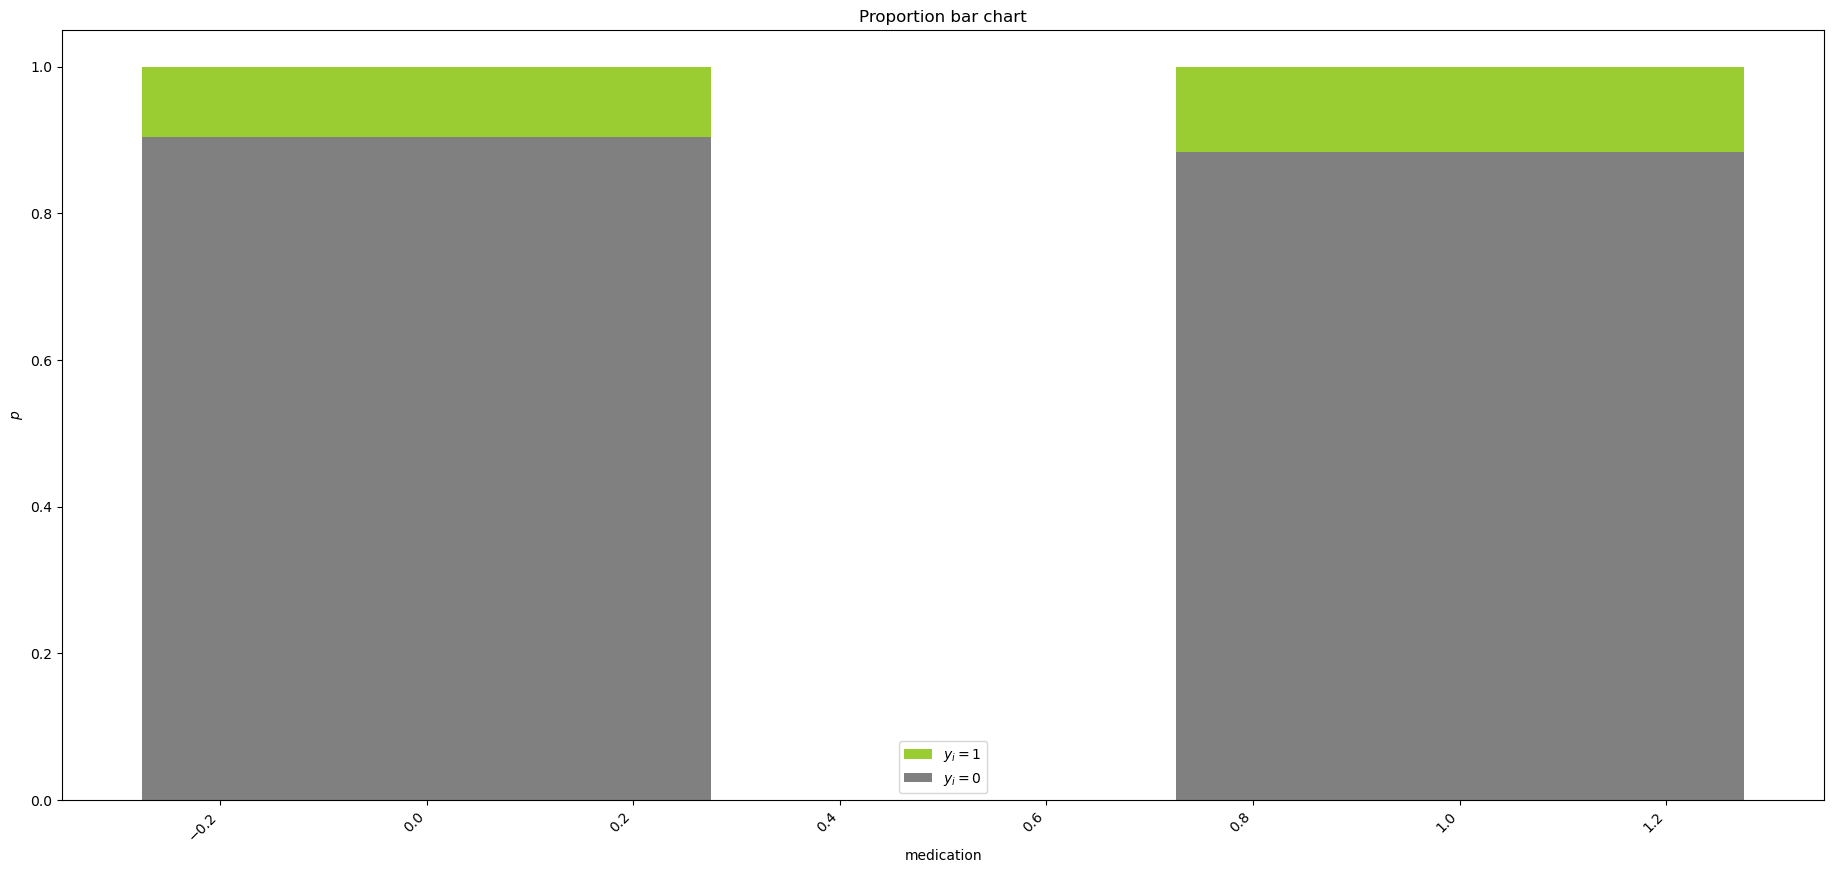

In [111]:
bar_charts_categorical(train, "medication", "readmitted_binary")

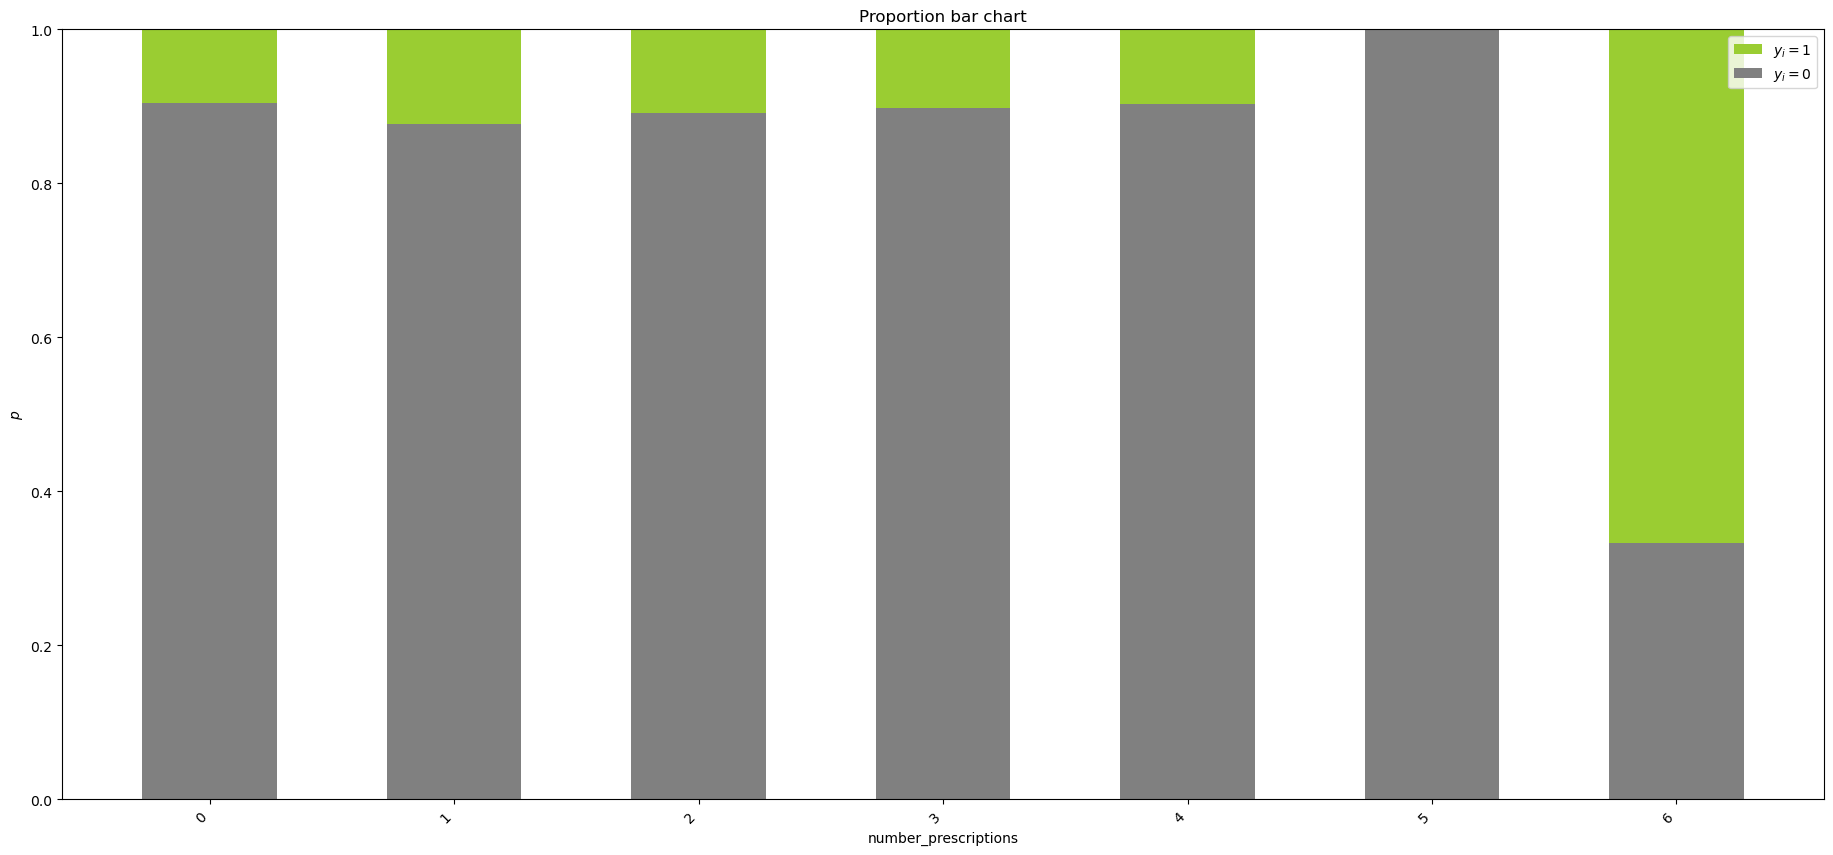

In [112]:
bar_charts_categorical(train, "number_prescriptions", "readmitted_binary")

In [113]:
pd.set_option('display.max_colwidth', None)
train[train['number_prescriptions']==5]['medication']

encounter_id
552573    1
123846    1
582550    1
779718    1
933380    1
447982    1
692561    1
589216    1
999052    1
451372    1
997560    1
994513    1
162953    1
531851    1
448305    1
456910    1
607305    1
949581    1
245459    1
235867    1
682270    1
957372    1
949034    1
410008    1
476361    1
346271    1
800891    1
982268    1
126332    1
692552    1
695395    1
472794    1
247216    1
731504    1
357162    1
886759    1
398539    1
826243    1
805062    1
986521    1
857791    1
Name: medication, dtype: int64

In [114]:
pd.set_option('display.max_colwidth', None)
train[train['number_prescriptions']==6][['medication','readmitted_binary']]

,medication,readmitted_binary
encounter_id,,
308794,1,Yes
837132,1,Yes
890037,1,No


In [115]:
# train['age'].unique()

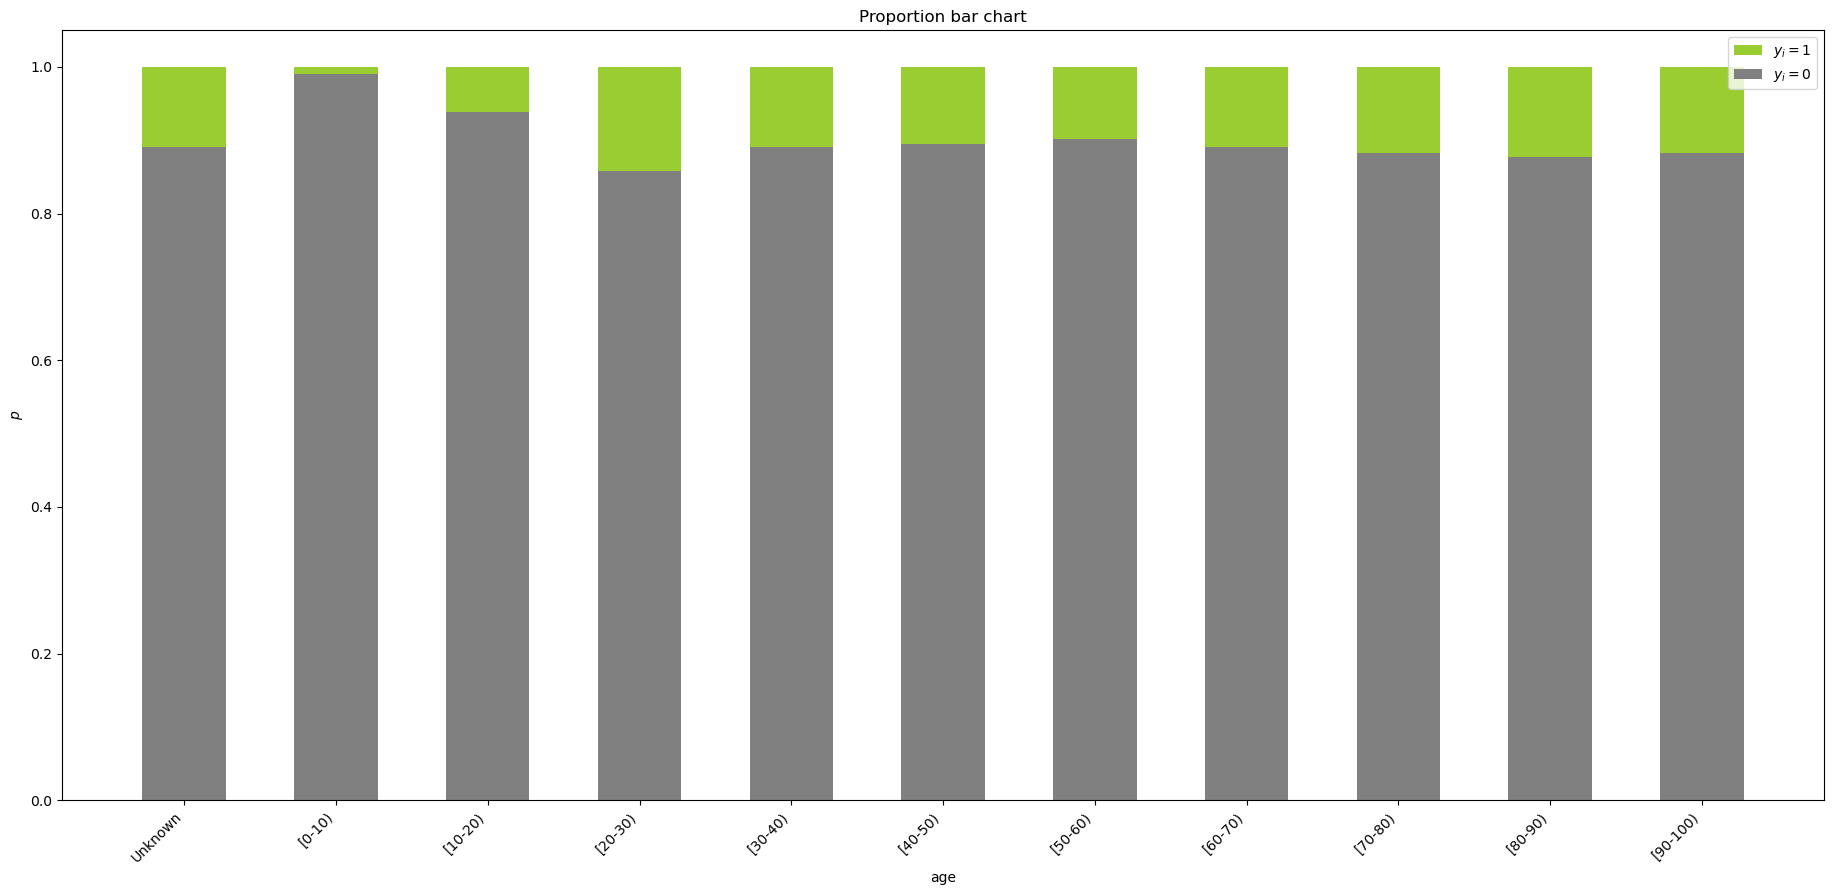

In [116]:
bar_charts_categorical(train, "age", "readmitted_binary")

In [117]:
data = train['age']
df = pd.DataFrame(data)

# Extract the lower and upper age values as separate columns
df[['Lower_Age', 'Upper_Age']] = df['age'].str.extract(r'\[(\d+)-(\d+)\)')

df['Lower_Age'] = pd.to_numeric(df['Lower_Age'], errors='coerce', downcast='integer')
df['Upper_Age'] = pd.to_numeric(df['Upper_Age'], errors='coerce', downcast='integer')


df['Midpoint_Age'] = average_age = np.where(df['Lower_Age'].notna() & df['Upper_Age'].notna(),
                       (df['Lower_Age'] + df['Upper_Age']) / 2,
                       np.nan)
train['Midpoint_Age'] = df['Midpoint_Age']
train.drop('age', axis=1, inplace=True)

In [118]:
train['gender'].value_counts()

gender
Female             38228
Male               33005
Unknown/Invalid        3
Name: count, dtype: int64

In [119]:
#Female = 0 Male = 1 and the Unknown/Invalid becomes Female because it is the mode
train['gender_binary'] = np.where(train['gender']== 'Male',1,0)
train.drop('gender', axis=1, inplace=True)

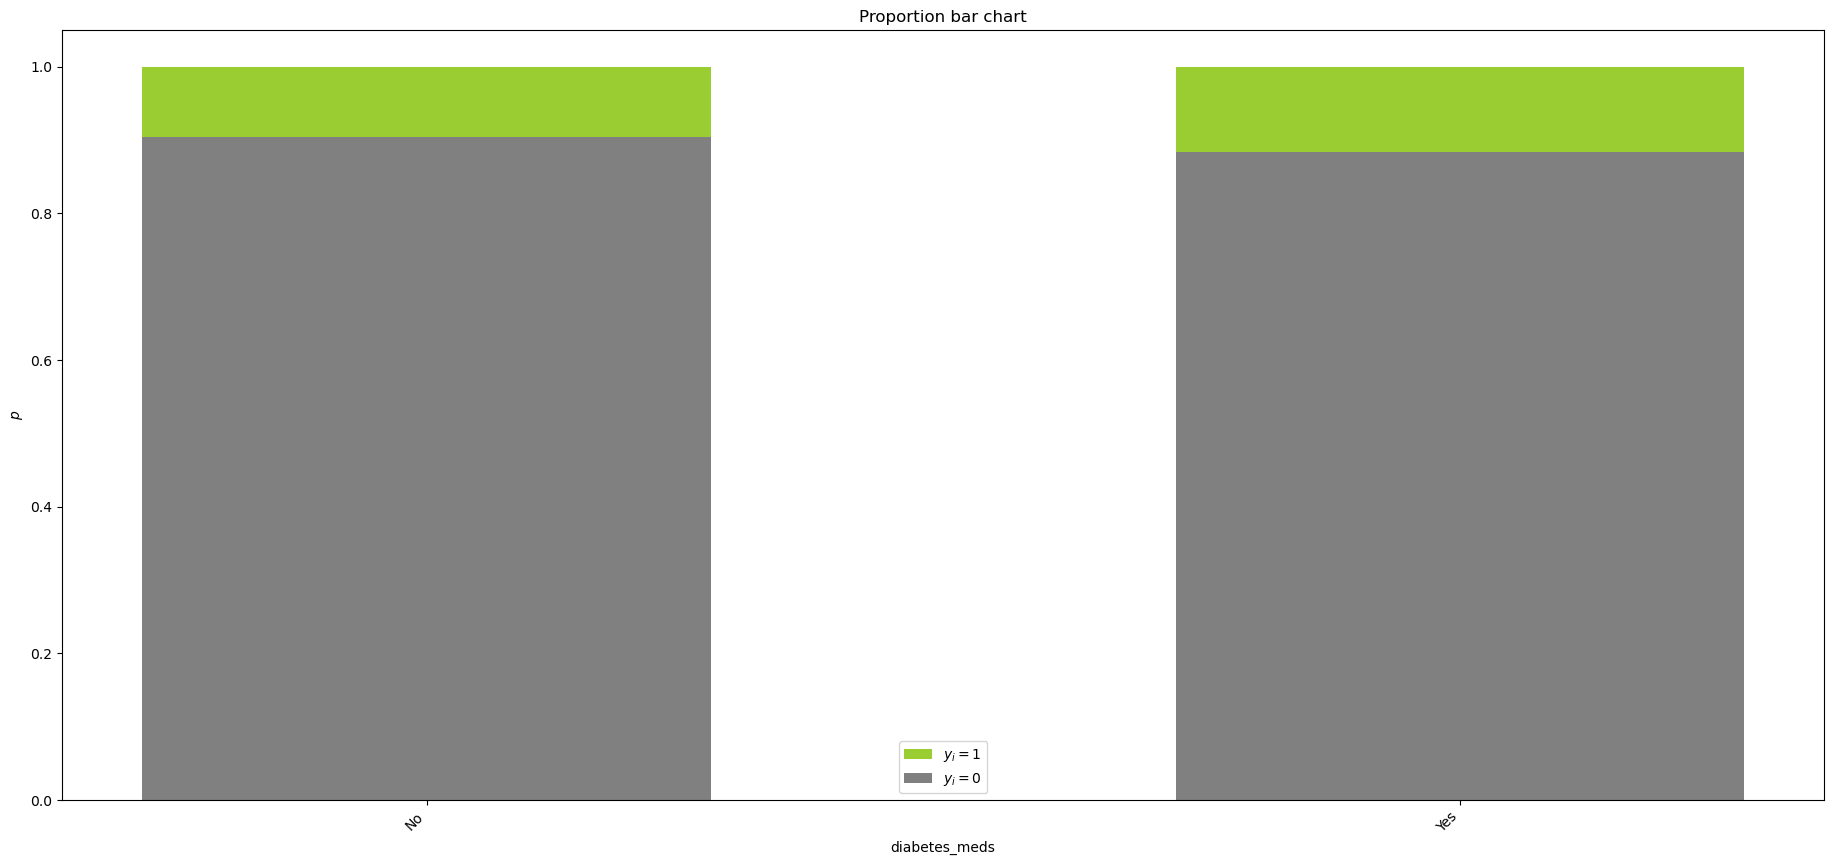

In [120]:
bar_charts_categorical(train, "diabetes_meds", "readmitted_binary")

In [121]:
#No = 0 Yes = 1
train['diabetes_meds_binary'] = np.where(train['diabetes_meds']== 'Yes',1,0)
train.drop('diabetes_meds', axis=1, inplace=True)

In [122]:
#no change = 0 change = 1
train['change_in_meds_binary'] = np.where(train['change_in_meds']== 'Ch',1,0)
train.drop('change_in_meds', axis=1, inplace=True)

In [123]:
n_categorical_columns= len(train.select_dtypes(exclude=np.number).columns)
categorical_columns = list(train.select_dtypes(exclude=np.number).columns)

print('There are',n_categorical_columns, 'columns with categorical values:')
print()
print(categorical_columns)

There are 13 columns with categorical values:

['race', 'payer_code', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'glucose_test_result', 'a1c_test_result', 'readmitted_binary', 'readmitted_multiclass']


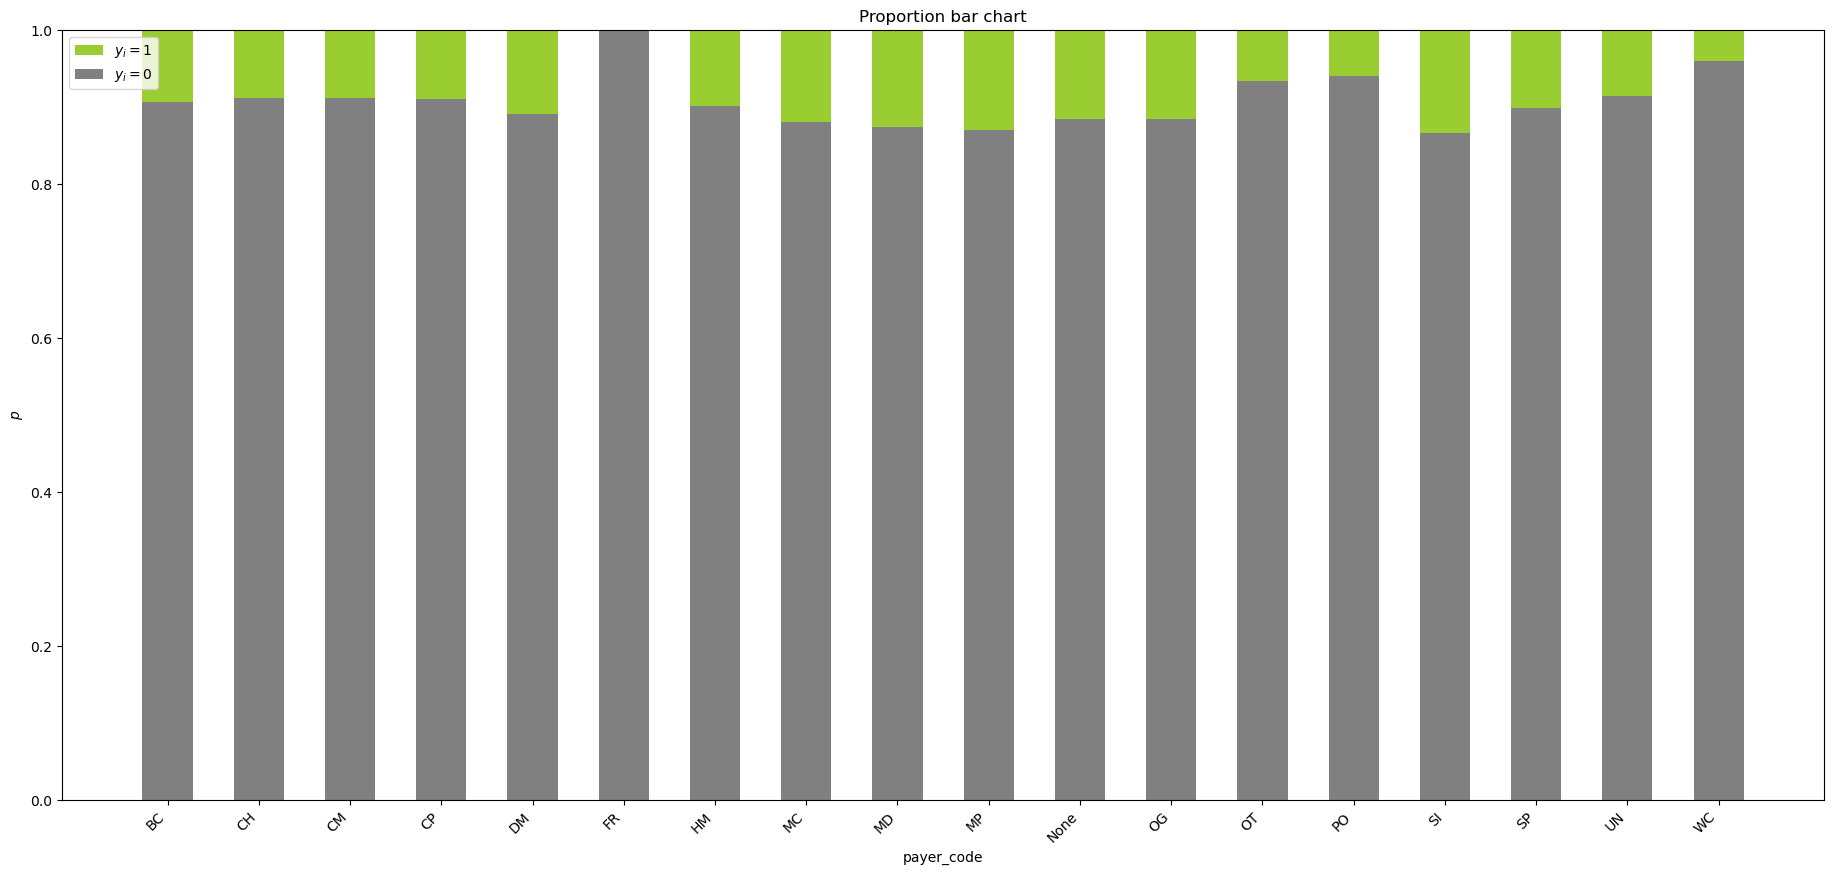

In [124]:
bar_charts_categorical(train, "payer_code", "readmitted_binary")

In [125]:
value_counts = train['payer_code'].value_counts(normalize=True)
replace_payer_code = value_counts[value_counts < 0.05].index

train['payer_code'] = train['payer_code'].replace(replace_payer_code, 'Other_code')
train['payer_code'].value_counts(normalize=True)

payer_code
None          0.395881
MC            0.318420
Other_code    0.225069
HM            0.060629
Name: proportion, dtype: float64

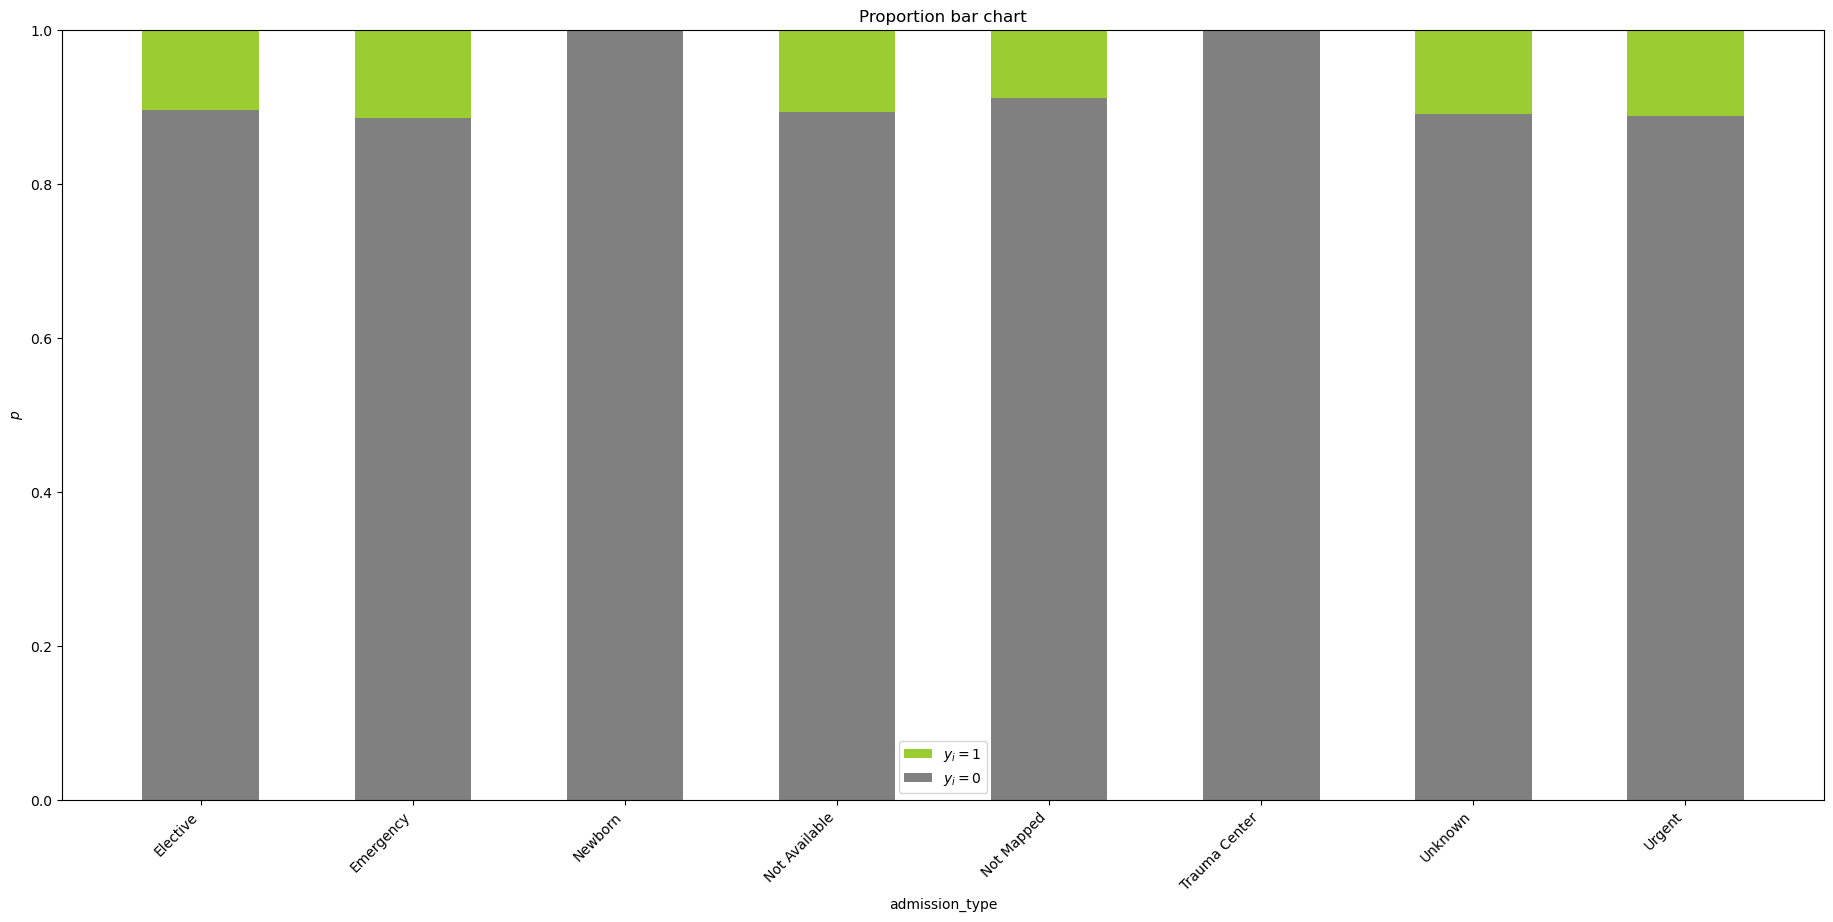

In [126]:
bar_charts_categorical(train, "admission_type", "readmitted_binary")

In [127]:
train["admission_type"].value_counts()

admission_type
Emergency        37742
Elective         13211
Urgent           13024
Unknown           3706
Not Available     3320
Not Mapped         214
Trauma Center       13
Newborn              6
Name: count, dtype: int64

In [128]:
train[train["admission_type"]=='Newborn'][['Midpoint_Age',"admission_type"]]

,Midpoint_Age,admission_type
encounter_id,,
268572,85.0,Newborn
531496,75.0,Newborn
129737,45.0,Newborn
394366,75.0,Newborn
203219,5.0,Newborn
792408,55.0,Newborn


In [129]:
train[train["admission_type"]=='Trauma Center'][['Midpoint_Age',"admission_type"]]

,Midpoint_Age,admission_type
encounter_id,,
693982,55.0,Trauma Center
150293,NaN,Trauma Center
477599,55.0,Trauma Center
764141,85.0,Trauma Center
694176,55.0,Trauma Center
658996,75.0,Trauma Center
203632,45.0,Trauma Center
444992,55.0,Trauma Center
674039,55.0,Trauma Center


In [130]:
train[train["admission_type"]=='Newborn'][['Midpoint_Age','readmitted_binary',"admission_type"]]

,Midpoint_Age,readmitted_binary,admission_type
encounter_id,,,
268572,85.0,No,Newborn
531496,75.0,No,Newborn
129737,45.0,No,Newborn
394366,75.0,No,Newborn
203219,5.0,No,Newborn
792408,55.0,No,Newborn


In [131]:
train[train["admission_type"]=='Trauma Center'][['Midpoint_Age','readmitted_binary',"admission_type"]]

,Midpoint_Age,readmitted_binary,admission_type
encounter_id,,,
693982,55.0,No,Trauma Center
150293,NaN,No,Trauma Center
477599,55.0,No,Trauma Center
764141,85.0,No,Trauma Center
694176,55.0,No,Trauma Center
658996,75.0,No,Trauma Center
203632,45.0,No,Trauma Center
444992,55.0,No,Trauma Center
674039,55.0,No,Trauma Center


In [132]:
value_counts = train['admission_type'].value_counts(normalize=True)
replace_admission_type = value_counts[value_counts < 0.05].index

train['admission_type'] = train['admission_type'].replace('Unknown', 'Other_type')
train['admission_type'] = train['admission_type'].replace(replace_admission_type, 'Other_type')
train['admission_type'].value_counts(normalize=True)

admission_type
Emergency     0.529816
Elective      0.185454
Urgent        0.182829
Other_type    0.101901
Name: proportion, dtype: float64

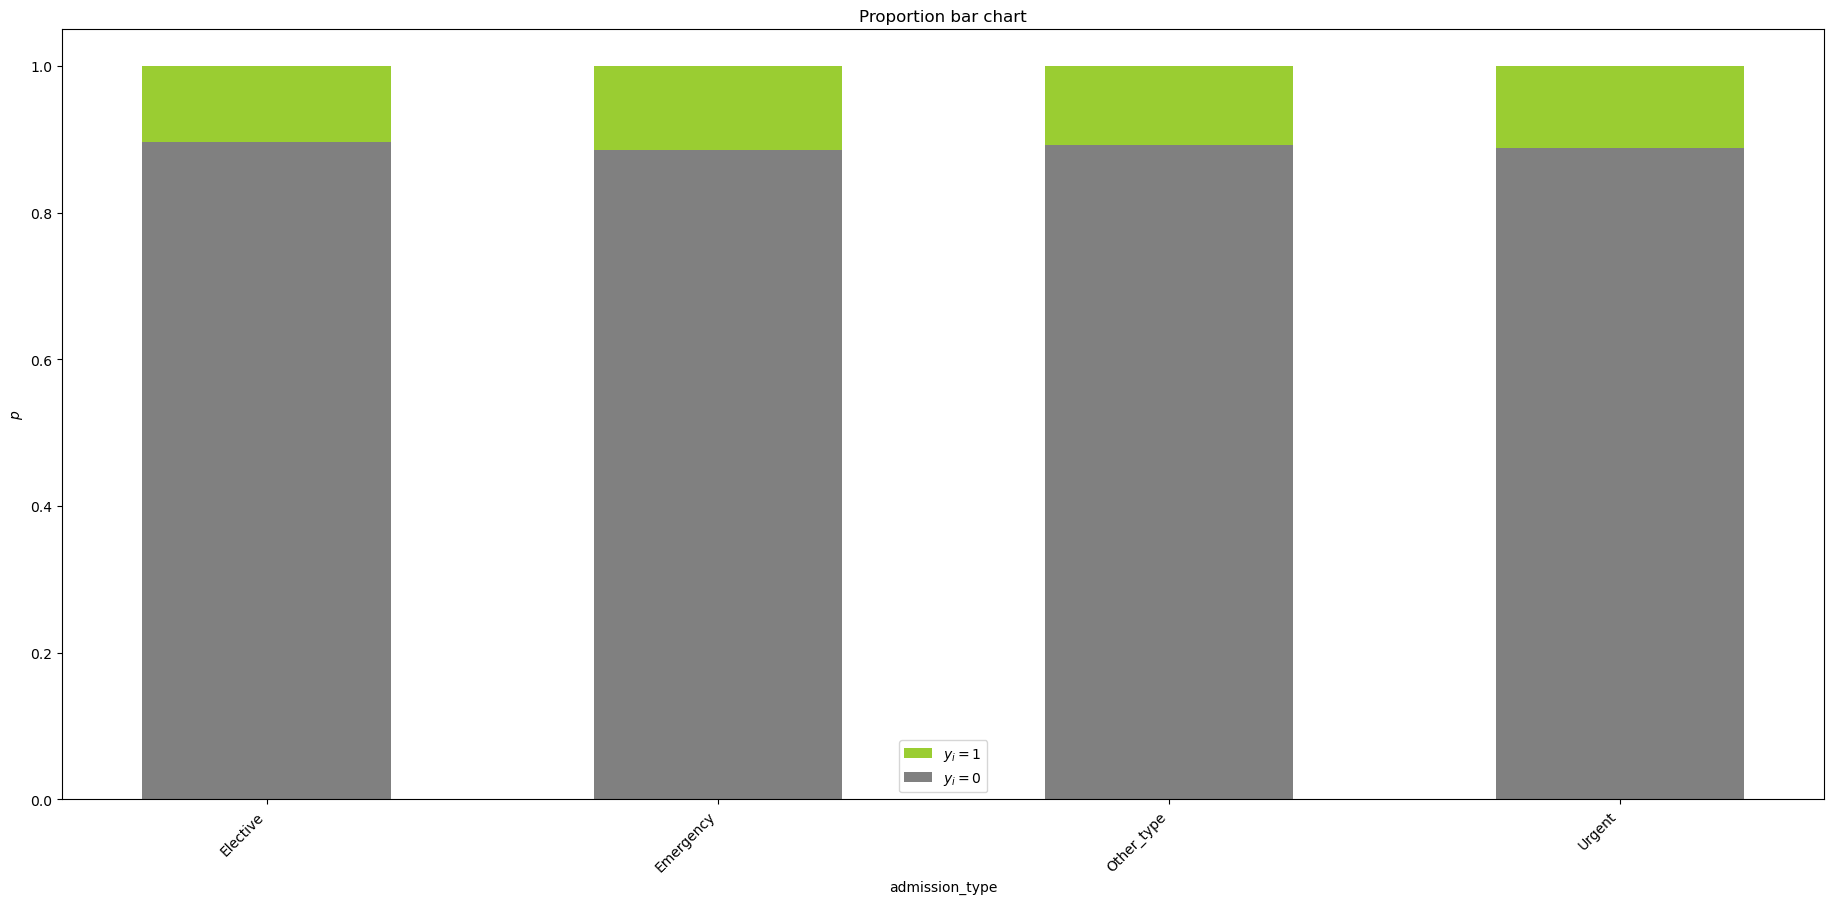

In [133]:
bar_charts_categorical(train, "admission_type", "readmitted_binary")

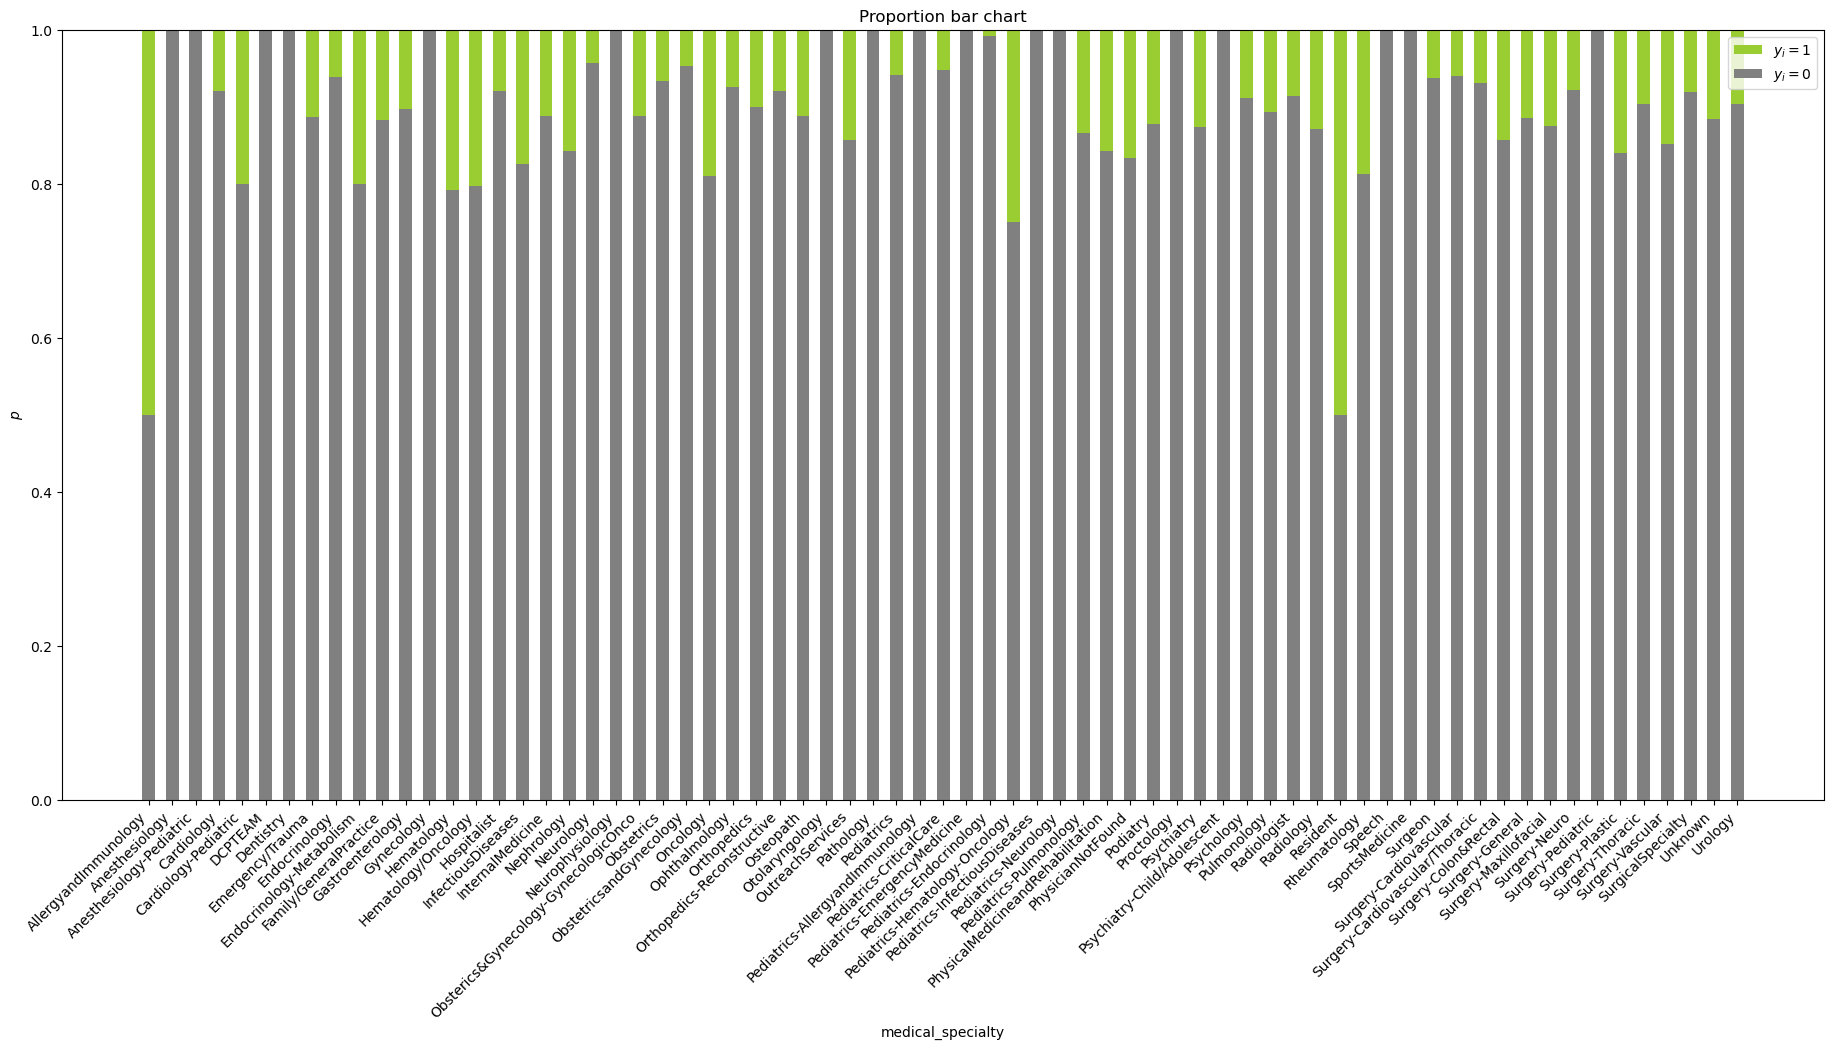

In [134]:
bar_charts_categorical(train, "medical_specialty", "readmitted_binary")

In [135]:
surgery = train[train['medical_specialty'].str.contains('Surgery|Surgeon|Reconstructive')]
train.loc[surgery.index, 'medical_specialty'] = 'Surgery'

pediatric = train[train['medical_specialty'].str.contains('Pediatrics|Pediatric')]
train.loc[pediatric.index, 'medical_specialty'] = 'Pediatric'

train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                                 0.490230
InternalMedicine                        0.144478
Emergency/Trauma                        0.074667
Family/GeneralPractice                  0.073235
Surgery                                 0.061556
Cardiology                              0.052165
Nephrology                              0.015947
Orthopedics                             0.013392
Radiologist                             0.011469
Pulmonology                             0.008577
Psychiatry                              0.008395
Urology                                 0.006710
ObstetricsandGynecology                 0.006570
Pediatric                               0.005784
Gastroenterology                        0.005573
PhysicalMedicineandRehabilitation       0.003931
Oncology                                0.003411
Hematology/Oncology                     0.002148
Neurology                               0.001937
Otolaryngology                          0.001207
En

In [136]:
value_counts = train['medical_specialty'].value_counts(normalize=True)
replace_medical_specialty = value_counts[value_counts < 0.05].index

train['medical_specialty'] = train['medical_specialty'].replace('Unknown', 'Other_specialty')
train['medical_specialty'] = train['medical_specialty'].replace(replace_medical_specialty, 'Other_specialty')
train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Other_specialty           0.593899
InternalMedicine          0.144478
Emergency/Trauma          0.074667
Family/GeneralPractice    0.073235
Surgery                   0.061556
Cardiology                0.052165
Name: proportion, dtype: float64

In [137]:
train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged to home                                                                                           0.593183
Discharged/transferred to SNF                                                                                0.137290
Discharged/transferred to home with home health service                                                      0.126411
Unknown                                                                                                      0.036358
Discharged/transferred to another short term hospital                                                        0.020888
Discharged/transferred to another rehab fac including rehab units of a hospital .                            0.019555
Expired                                                                                                      0.015933
Discharged/transferred to another type of inpatient care institution                                         0.011539
Not Mapped                        

In [138]:
expired = train[train['discharge_disposition'].str.contains('Expired')]
train.loc[expired.index, 'discharge_disposition'] = 'Expired'

hospice = train[train['discharge_disposition'].str.contains('Hospice')]
train.loc[hospice.index, 'discharge_disposition'] = 'Hospice'

another_medical_facility = ['Discharged/transferred to SNF', 'Discharged/transferred to another short term hospital', 'Discharged/transferred to another rehab fac including rehab units of a hospital', 'Discharged/transferred to another type of inpatient care institution', 'Discharged/transferred to a long term care hospital', 'Discharged/transferred to a federal health care facility','Neonate discharged to another hospital for neonatal aftercare']
train['discharge_disposition'] = train['discharge_disposition'].replace(another_medical_facility, 'Transferred to another medical facility')

outpatient = ['Discharged/transferred/referred to this institution for outpatient services','Discharged/transferred/referred another institution for outpatient services']
train['discharge_disposition'] = train['discharge_disposition'].replace(outpatient, 'Discharged/transferred/referred another/this institution for outpatient services')

home = train[train['discharge_disposition'].str.contains('home')]
train.loc[home.index, 'discharge_disposition'] = 'Discharged to home'

other = ['Discharged/transferred to another rehab fac including rehab units of a hospital','Discharged/transferred to ICF','Hospice',
         'Left AMA','Discharged/transferred to a long term care hospital.','Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
         'Discharged/transferred within this institution to Medicare approved swing bed','Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
         'Discharged/transferred/referred another/this institution for outpatient services',
         'Discharged/transferred to a federal health care facility.','Discharged/transferred to another rehab fac including rehab units of a hospital .','Unknown']

train['discharge_disposition'] = train['discharge_disposition'].replace(other, 'Other')


train['discharge_disposition'] = train['discharge_disposition'].replace('Not Mapped', 'Unknown')

train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged to home                                             0.720731
Transferred to another medical facility                        0.169746
Other                                                          0.083750
Expired                                                        0.016031
Unknown                                                        0.009532
Admitted as an inpatient to this hospital                      0.000182
Still patient or expected to return for outpatient services    0.000028
Name: proportion, dtype: float64

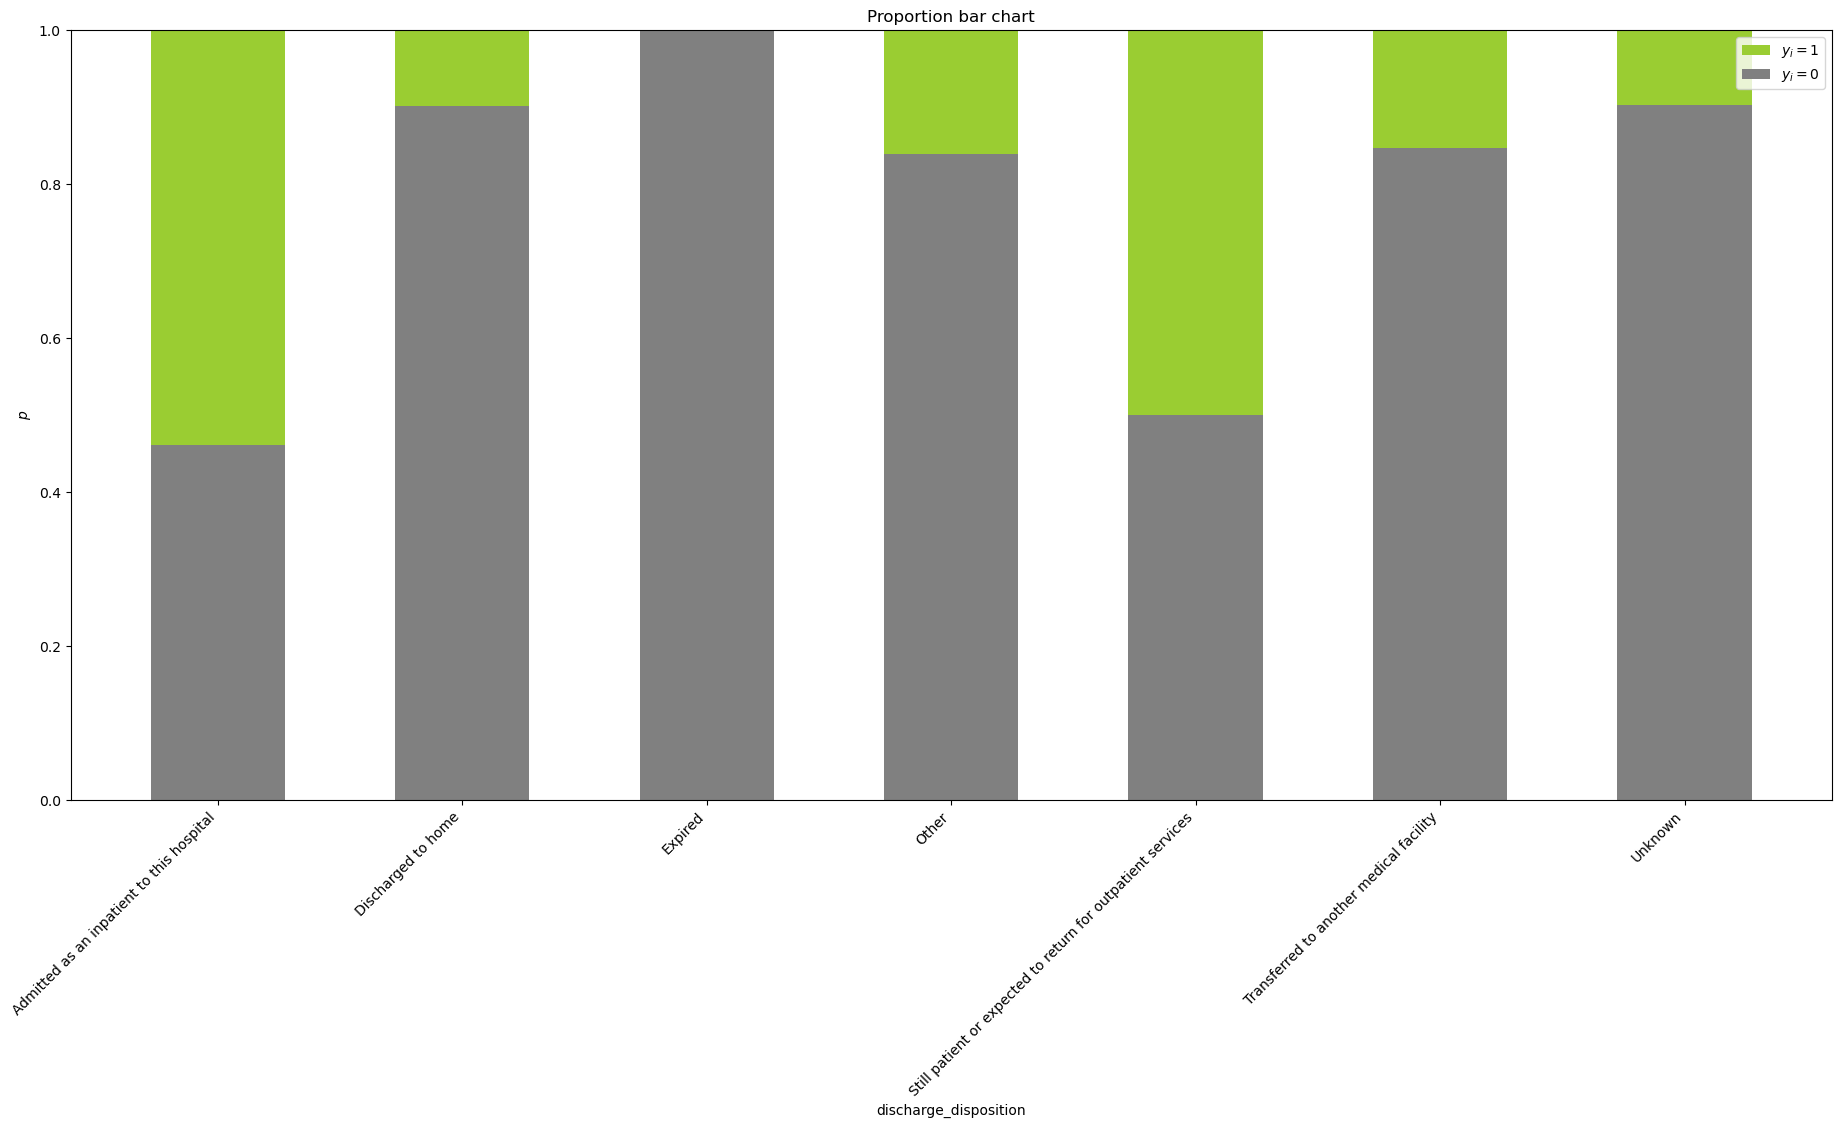

In [139]:
bar_charts_categorical(train, "discharge_disposition", "readmitted_binary")

In [140]:
unknown = [' Not Mapped',' Not Available']
train['admission_source'] = train['admission_source'].replace(unknown, 'Unknown')
train['admission_source'].value_counts(normalize=True)

admission_source
 Emergency Room                                               0.565992
 Physician Referral                                           0.290275
Unknown                                                       0.068968
Transfer from a hospital                                      0.031304
 Transfer from another health care facility                   0.021927
Clinic Referral                                               0.010935
 Transfer from a Skilled Nursing Facility (SNF)               0.008353
HMO Referral                                                  0.001811
 Court/Law Enforcement                                        0.000154
 Transfer from hospital inpt/same fac reslt in a sep claim    0.000112
 Transfer from critial access hospital                        0.000098
 Transfer from Ambulatory Surgery Center                      0.000028
 Extramural Birth                                             0.000014
Normal Delivery                                             

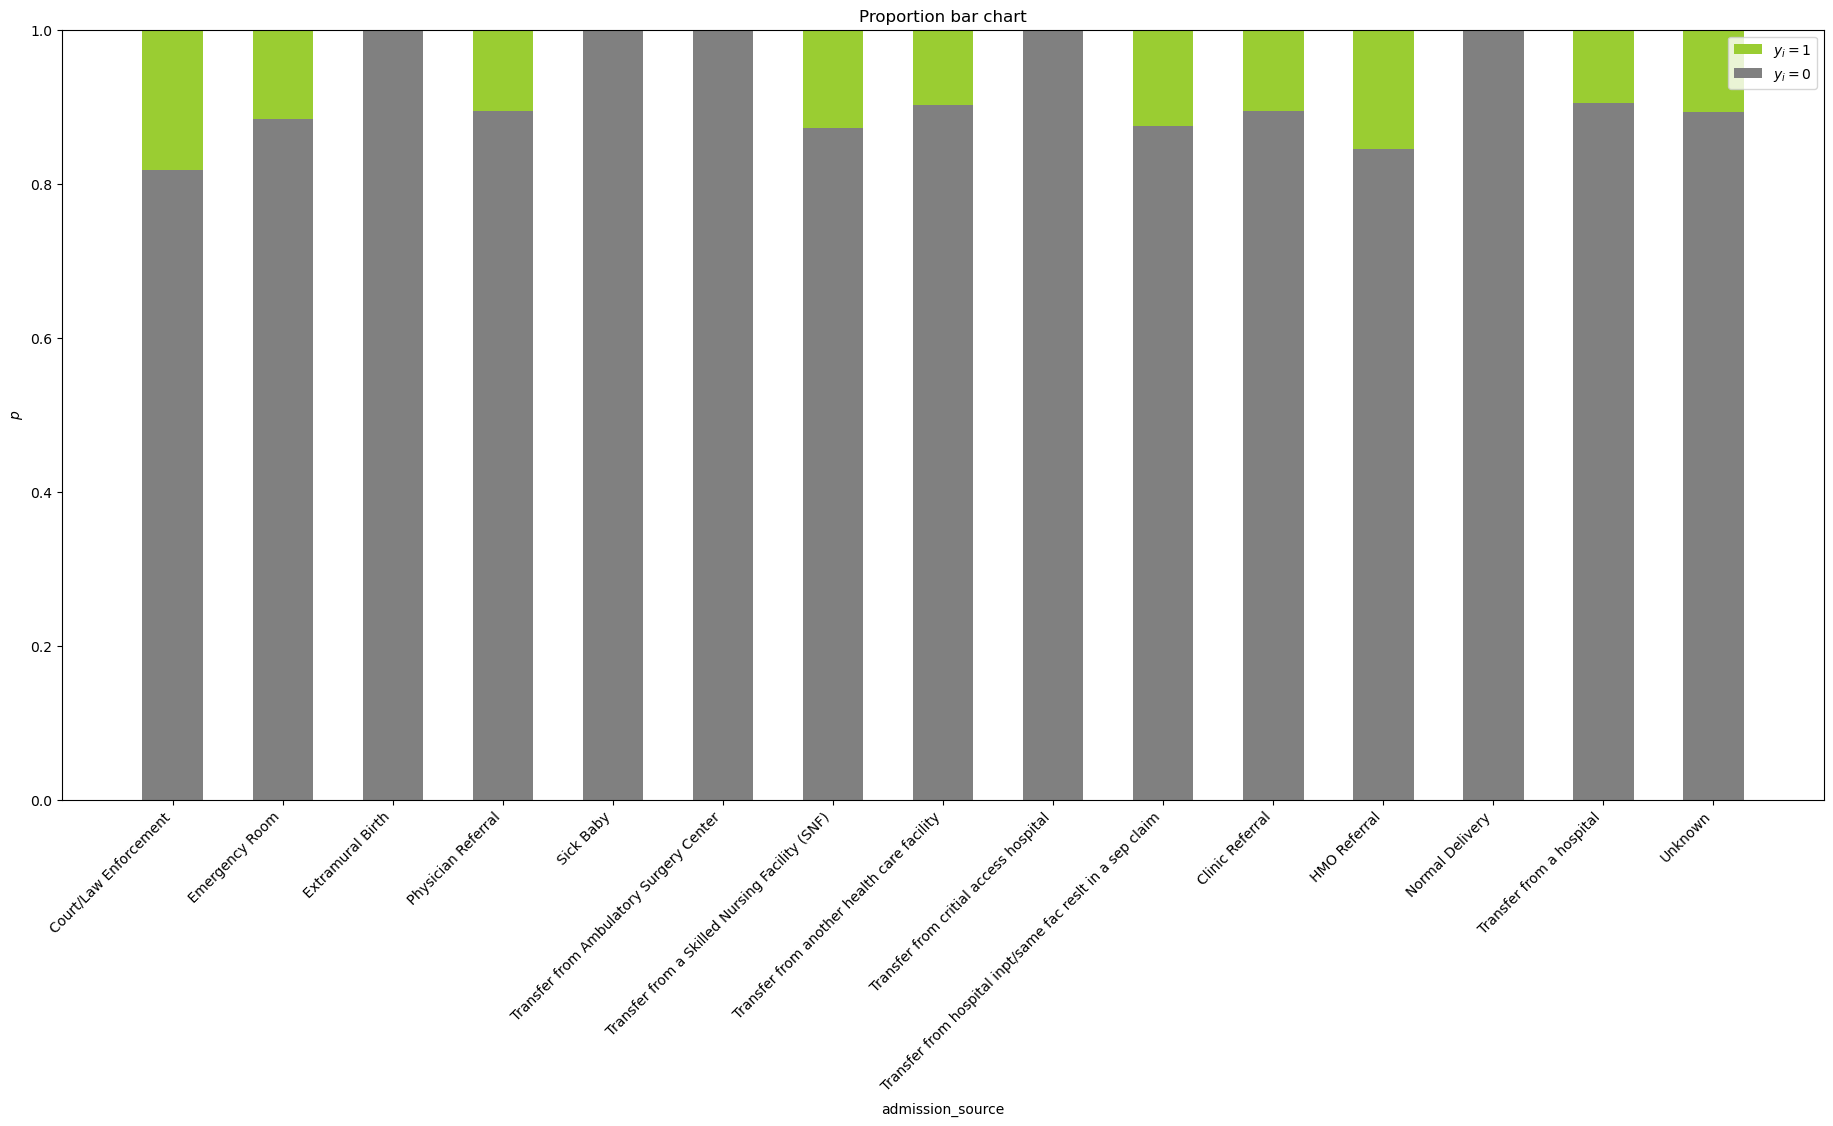

In [141]:
bar_charts_categorical(train, "admission_source", "readmitted_binary")

In [142]:
# Unknown provavelmente é os casos onde nao vem de lado nenhum

In [143]:
value_counts = train['admission_source'].value_counts(normalize=True)
replace_admission_source = value_counts[value_counts < 0.05].index

train['admission_source'] = train['admission_source'].replace(replace_admission_source, 'Other_source')
train['admission_source'] = train['admission_source'].replace('Unknown', 'Other_source')
train['admission_source'].value_counts(normalize=True)

admission_source
 Emergency Room        0.565992
 Physician Referral    0.290275
Other_source           0.143734
Name: proportion, dtype: float64

In [144]:
def diagosis_types_division(x):
    try:
        x = int(x)
        if x <= 139 and x>=1:
            return 'Infectious and parasitic diseases'
        elif x <= 239 and x>=140:
            return 'Neoplasms'
        elif x <= 279 and x>=240:
            return 'Endocrine, nutritional and metabolic diseases, and immunity disorders'
        elif x <= 289 and x>=280:
            return 'Diseases of the blood and blood-forming organs'
        elif x <= 319 and x>=290:
            return 'Mental disorders'
        elif x <= 389 and x>=320:
            return 'Diseases of the nervous system and sense organs'
        elif x <= 459 and x>=390:
            return 'Diseases of the circulatory system'
        elif x <= 519 and x>=460:
            return 'Diseases of the respiratory system'
        elif x <= 579 and x>=520:
            return 'Diseases of the digestive system'
        elif x <= 629 and x>=580:
            return 'Diseases of the genitourinary system'
        elif x <= 679 and x>=630:
            return 'Complications of pregnancy, childbirth, and the puerperium'
        elif x <= 709 and x>=680:
            return 'Diseases of the skin and subcutaneous tissue'
        elif x <= 739 and x>=710:
            return 'Diseases of the musculoskeletal system and connective tissue'
        elif x <= 759 and x>=740:
            return 'Congenital anomalies'
        elif x <= 779 and x>=760:
            return 'Certain conditions originating in the perinatal period'
        elif x <= 799 and x>=780:
            return 'Symptoms, signs, and ill-defined conditions'
        elif x <= 999 and x>=800:
            return 'Injury and poisoning'
        else:
            return 'External causes of injury and supplemental classification'
    except ValueError:
        return 'External causes of injury and supplemental classification'

train['primary_diagnosis_types'] = train['primary_diagnosis'].apply(diagosis_types_division)
train['secondary_diagnosis_types'] = train['secondary_diagnosis'].apply(diagosis_types_division)
train['additional_diagnosis_types'] = train['additional_diagnosis'].apply(diagosis_types_division)
train.drop(['primary_diagnosis','secondary_diagnosis','additional_diagnosis'], axis=1, inplace=True)

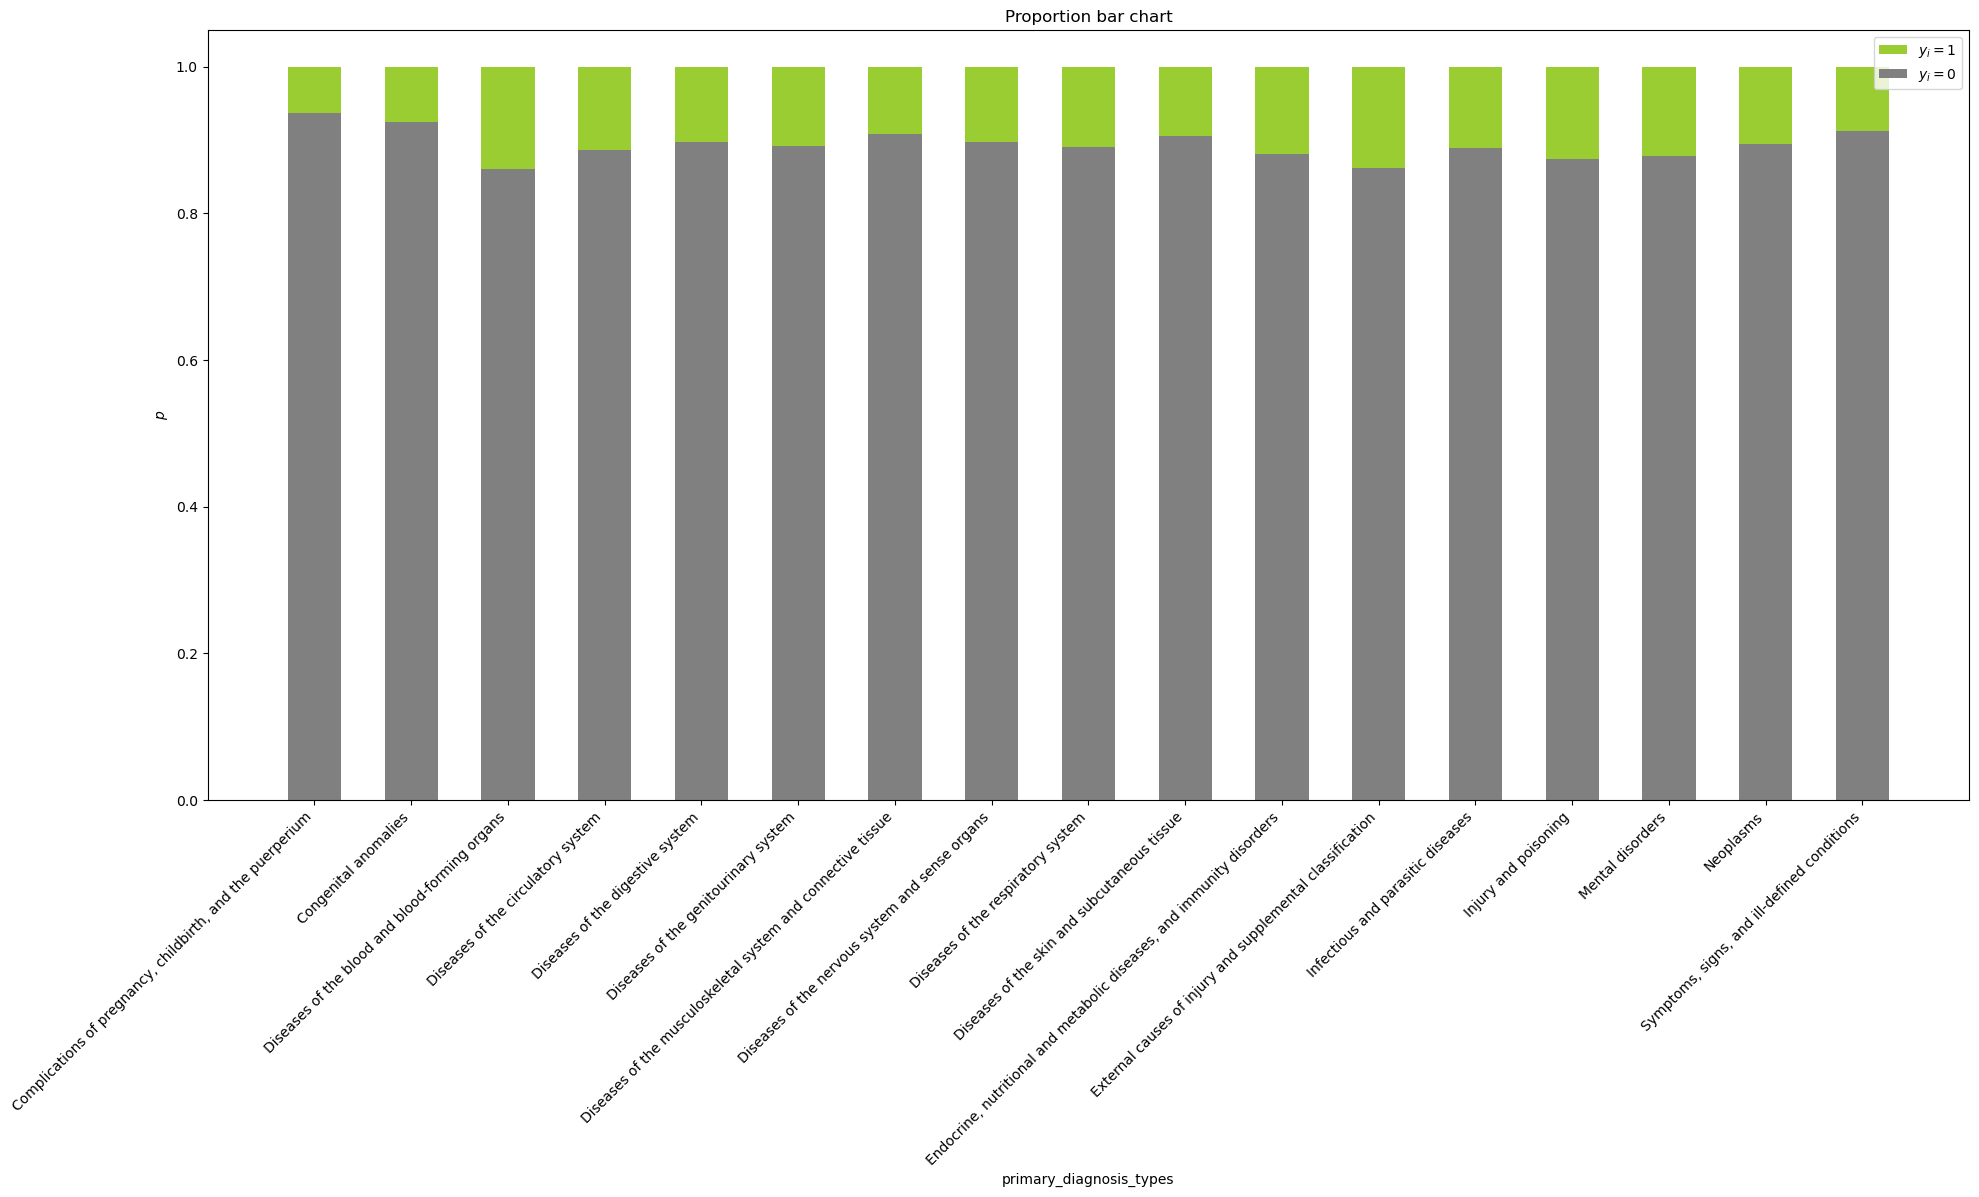

In [145]:
bar_charts_categorical(train, "primary_diagnosis_types", "readmitted_binary")

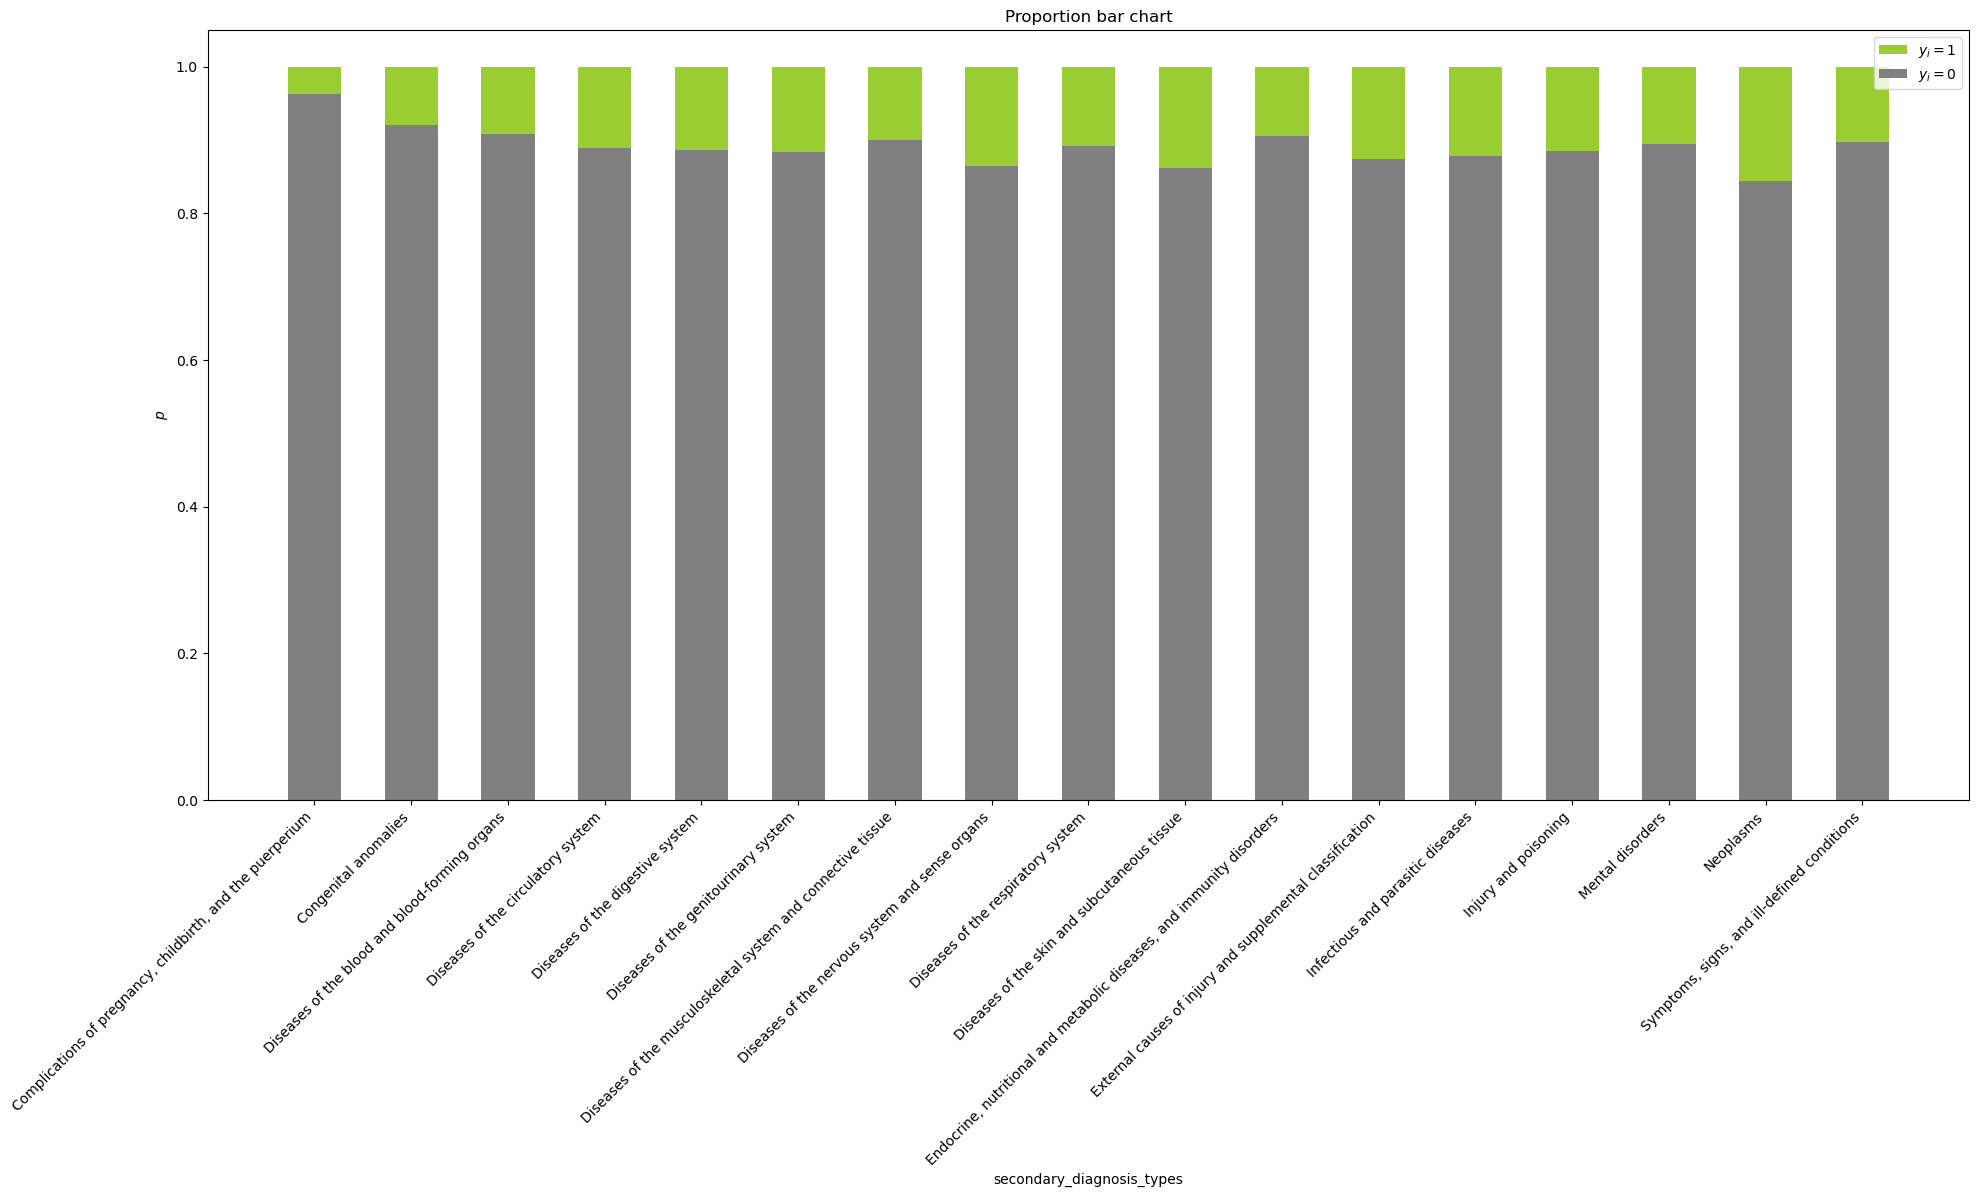

In [146]:
bar_charts_categorical(train, "secondary_diagnosis_types", "readmitted_binary")

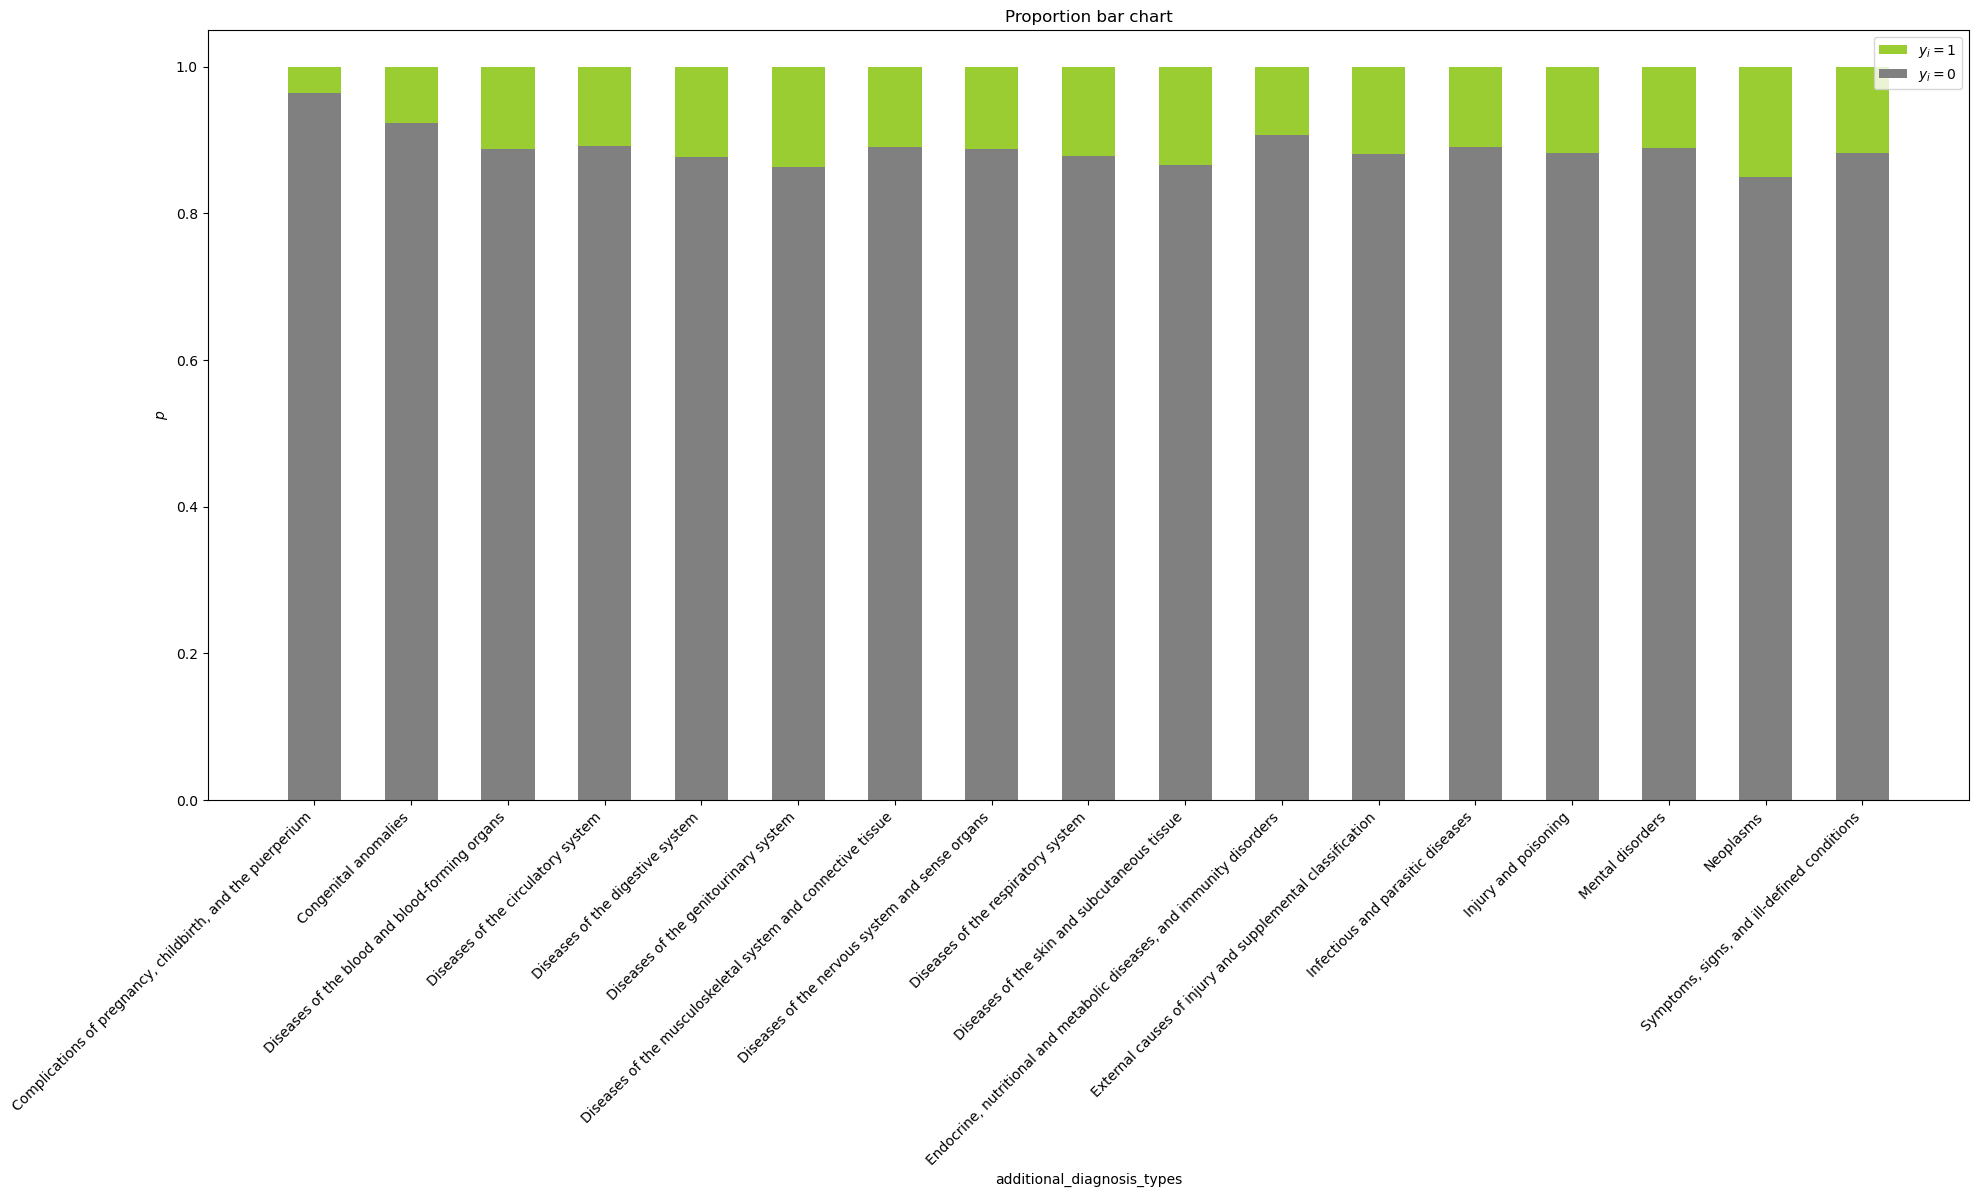

In [147]:
bar_charts_categorical(train, "additional_diagnosis_types", "readmitted_binary")

In [148]:
value_counts = train['primary_diagnosis_types'].value_counts(normalize=True)
replace_primary_diagnosis = value_counts[value_counts < 0.05].index

train['primary_diagnosis_types'] = train['primary_diagnosis_types'].replace(replace_primary_diagnosis, 'Other_type')
train['primary_diagnosis_types'].value_counts(normalize=True)

primary_diagnosis_types
Diseases of the circulatory system                           0.297925
Other_type                                                   0.265063
Diseases of the respiratory system                           0.102350
External causes of injury and supplemental classification    0.099753
Diseases of the digestive system                             0.090909
Symptoms, signs, and ill-defined conditions                  0.075481
Injury and poisoning                                         0.068519
Name: proportion, dtype: float64

In [149]:
value_counts = train['secondary_diagnosis_types'].value_counts(normalize=True)
replace_secondary_diagnosis = value_counts[value_counts < 0.05].index

train['secondary_diagnosis_types'] = train['secondary_diagnosis_types'].replace(replace_secondary_diagnosis, 'Other_type')
train['secondary_diagnosis_types'].value_counts(normalize=True)

secondary_diagnosis_types
Diseases of the circulatory system                                       0.308819
Other_type                                                               0.276700
Endocrine, nutritional and metabolic diseases, and immunity disorders    0.140421
Diseases of the respiratory system                                       0.100960
External causes of injury and supplemental classification                0.094376
Diseases of the genitourinary system                                     0.078724
Name: proportion, dtype: float64

In [150]:
value_counts = train['additional_diagnosis_types'].value_counts(normalize=True)
replace_additional_diagnosis = value_counts[value_counts < 0.05].index

train['additional_diagnosis_types'] = train['additional_diagnosis_types'].replace(replace_additional_diagnosis, 'Other_type')
train['additional_diagnosis_types'].value_counts(normalize=True)

additional_diagnosis_types
Diseases of the circulatory system                                       0.294219
Other_type                                                               0.255966
Endocrine, nutritional and metabolic diseases, and immunity disorders    0.202678
External causes of injury and supplemental classification                0.118016
Diseases of the respiratory system                                       0.066385
Diseases of the genitourinary system                                     0.062735
Name: proportion, dtype: float64

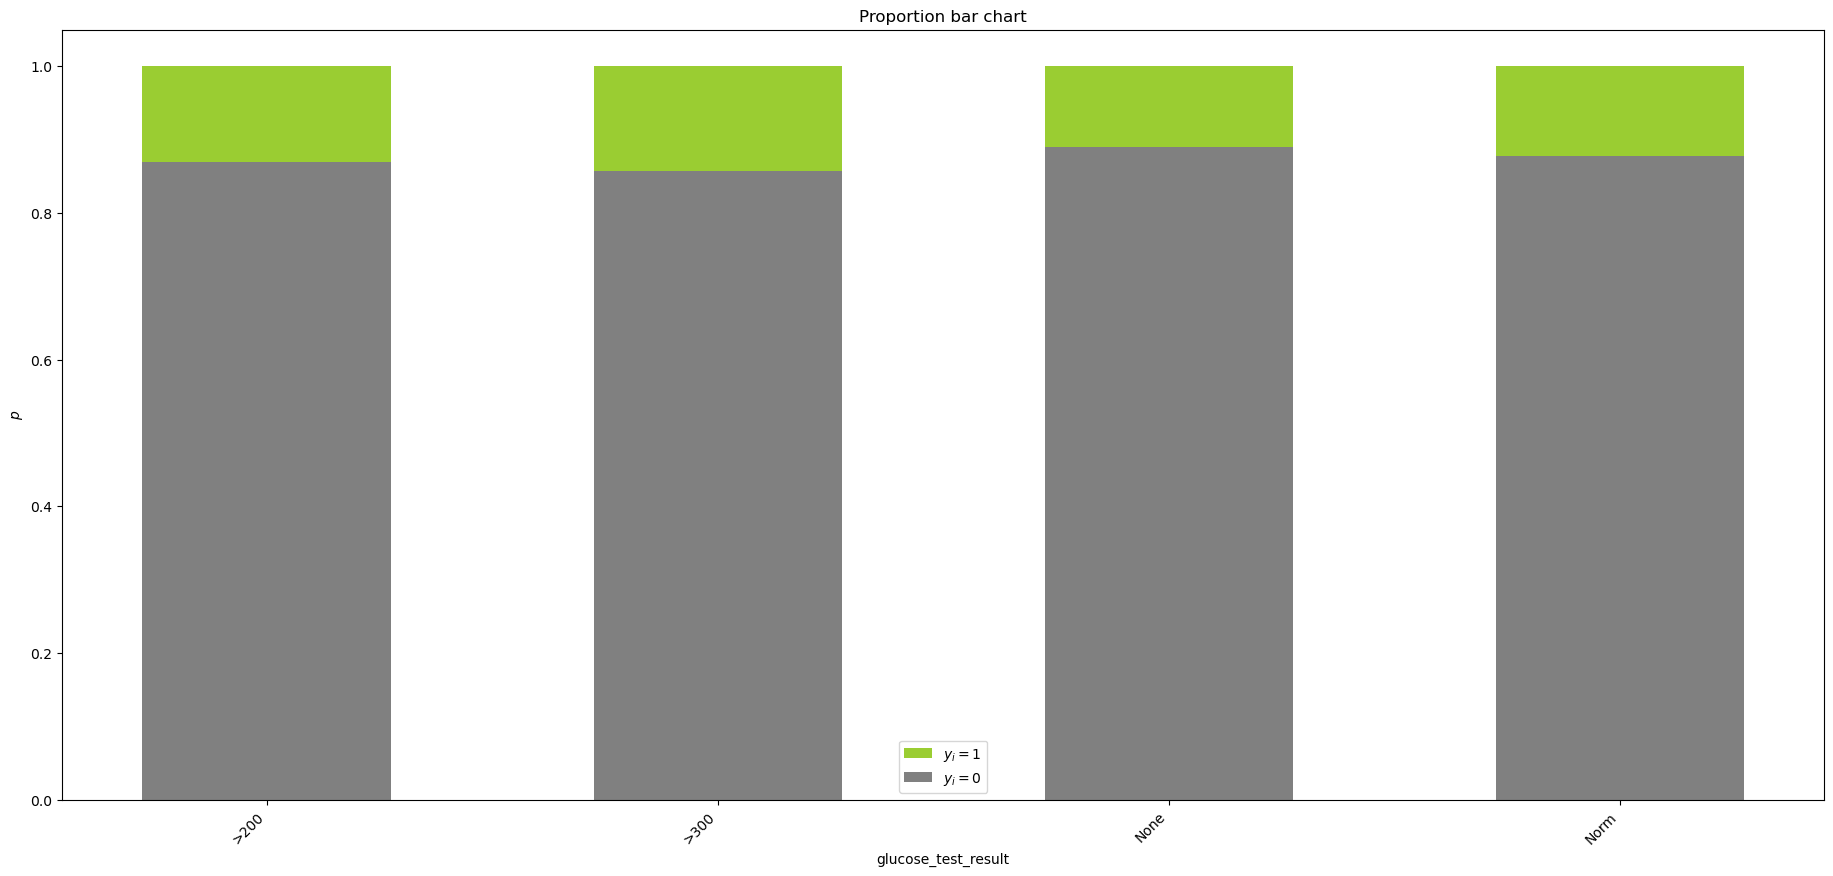

In [151]:
bar_charts_categorical(train, "glucose_test_result", "readmitted_binary")

In [152]:
train['glucose_test_result'].value_counts(normalize=True)

glucose_test_result
None    0.948228
Norm    0.025352
>200    0.014810
>300    0.011609
Name: proportion, dtype: float64

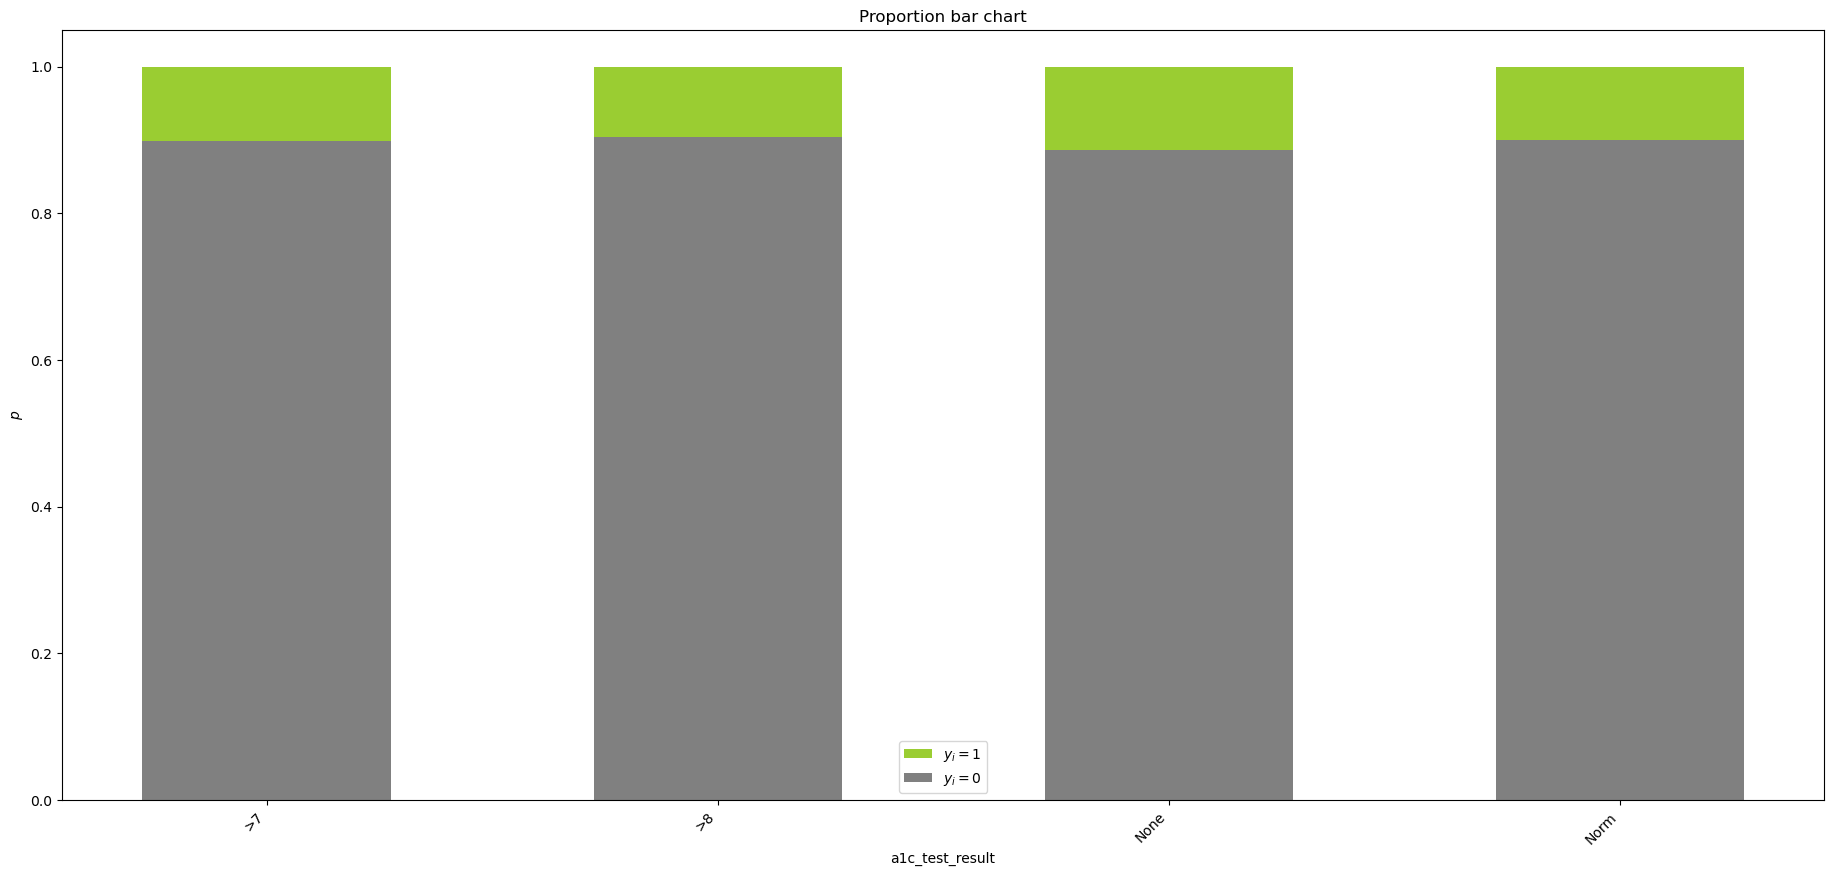

In [153]:
bar_charts_categorical(train, "a1c_test_result", "readmitted_binary")

In [154]:
train['a1c_test_result'].value_counts(normalize=True)

a1c_test_result
None    0.832725
>8      0.080086
Norm    0.049175
>7      0.038014
Name: proportion, dtype: float64

In [155]:
train.head()

,patient_id,race,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,average_pulse_bpm,discharge_disposition,...,readmitted_binary,readmitted_multiclass,number_prescriptions,Midpoint_Age,gender_binary,diabetes_meds_binary,change_in_meds_binary,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,70110,Caucasian,None,0,0,2,Emergency,Family/GeneralPractice,127,Discharged to home,...,No,>30 days,0,75.0,0,0,0,Diseases of the respiratory system,"Endocrine, nutritional and metabolic diseases, and immunity disorders",Diseases of the respiratory system
426224,29775006,AfricanAmerican,None,0,0,0,Emergency,Other_specialty,128,Other,...,No,No,1,55.0,1,1,0,Other_type,Other_type,Other_type
634063,80729253,Caucasian,None,0,0,1,Other_type,Family/GeneralPractice,94,Discharged to home,...,No,No,2,65.0,0,1,1,Diseases of the digestive system,Other_type,"Endocrine, nutritional and metabolic diseases, and immunity disorders"
890610,2919042,AfricanAmerican,MC,0,0,1,Emergency,InternalMedicine,81,Discharged to home,...,No,No,0,65.0,1,0,0,Diseases of the digestive system,Other_type,Diseases of the circulatory system
654194,84871971,Caucasian,HM,1,0,0,Elective,Other_specialty,126,Discharged to home,...,No,>30 days,0,75.0,0,0,0,Other_type,Diseases of the genitourinary system,Diseases of the circulatory system


In [156]:
type(train['Midpoint_Age'].iloc[0])

numpy.float64

In [157]:
def label_pulse(row):
    if row['Midpoint_Age']==5.0:
        if row['average_pulse_bpm'] >= 70 and row['average_pulse_bpm'] <= 130:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']<= 45.0 and row['Midpoint_Age'] >= 25.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 110:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']==55.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 100:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']>=65.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 95:
            return 1
        else:
            return 0
    else:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 100:
            return 1
        else:
            return 0

train['is_normal_pulse'] = train.apply(lambda row: label_pulse(row), axis=1)

In [158]:
train['is_normal_pulse'].value_counts(normalize=True)

is_normal_pulse
0    0.512044
1    0.487956
Name: proportion, dtype: float64

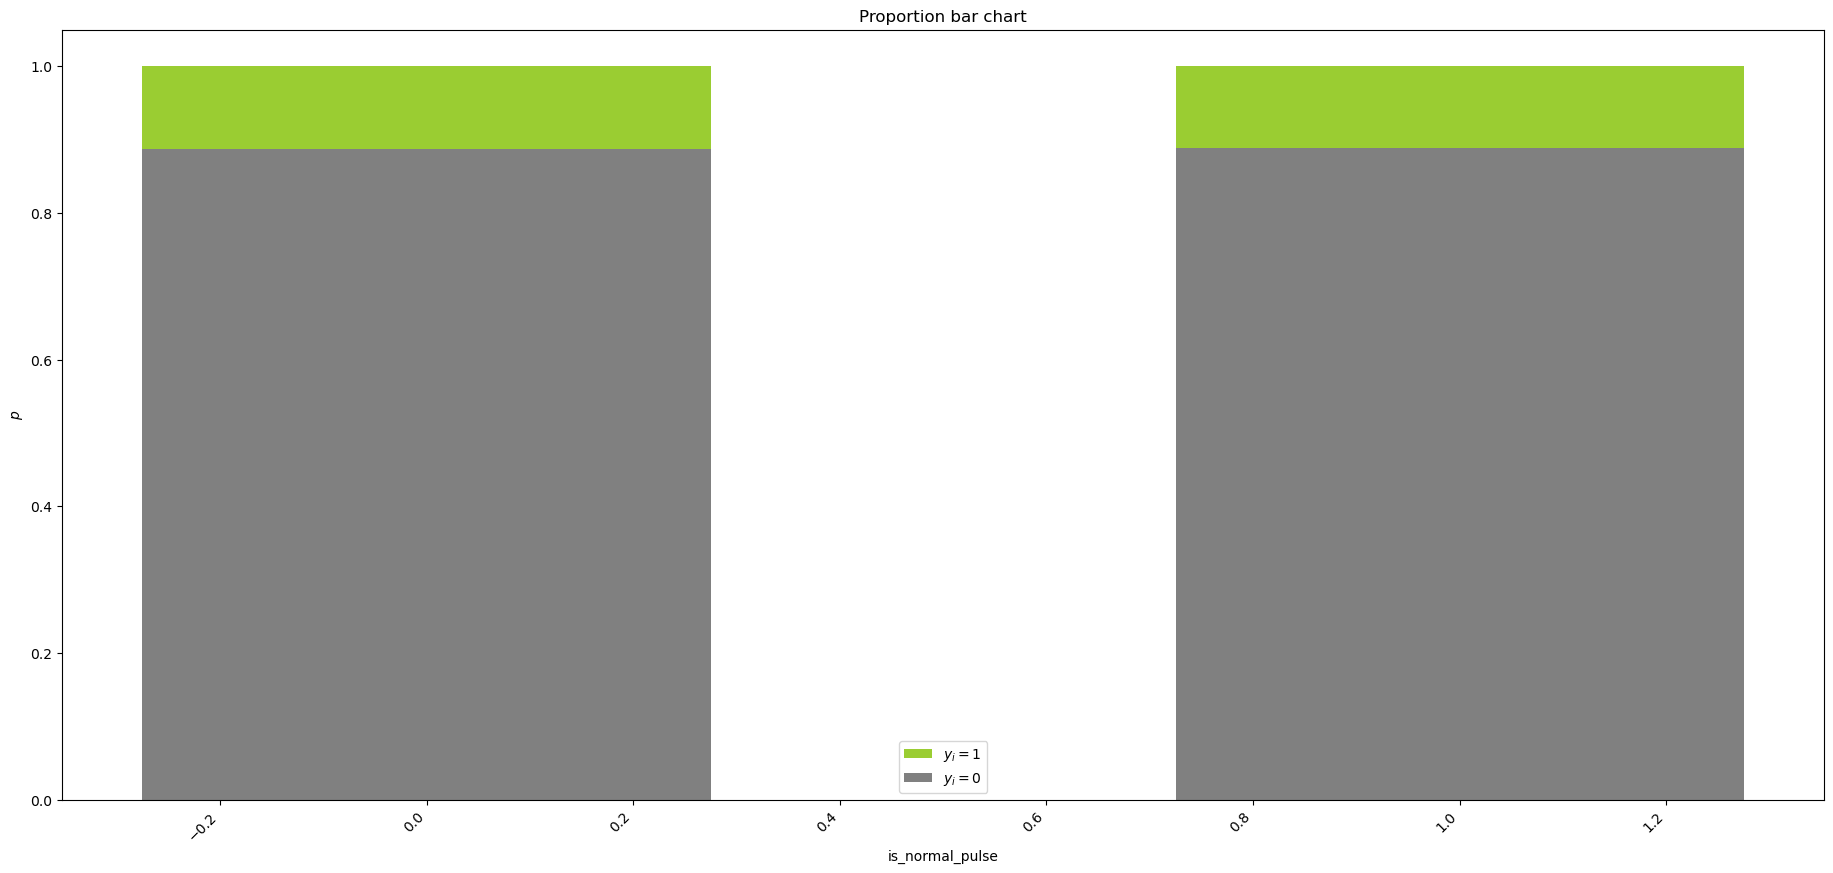

In [159]:
bar_charts_categorical(train, "is_normal_pulse", "readmitted_binary")

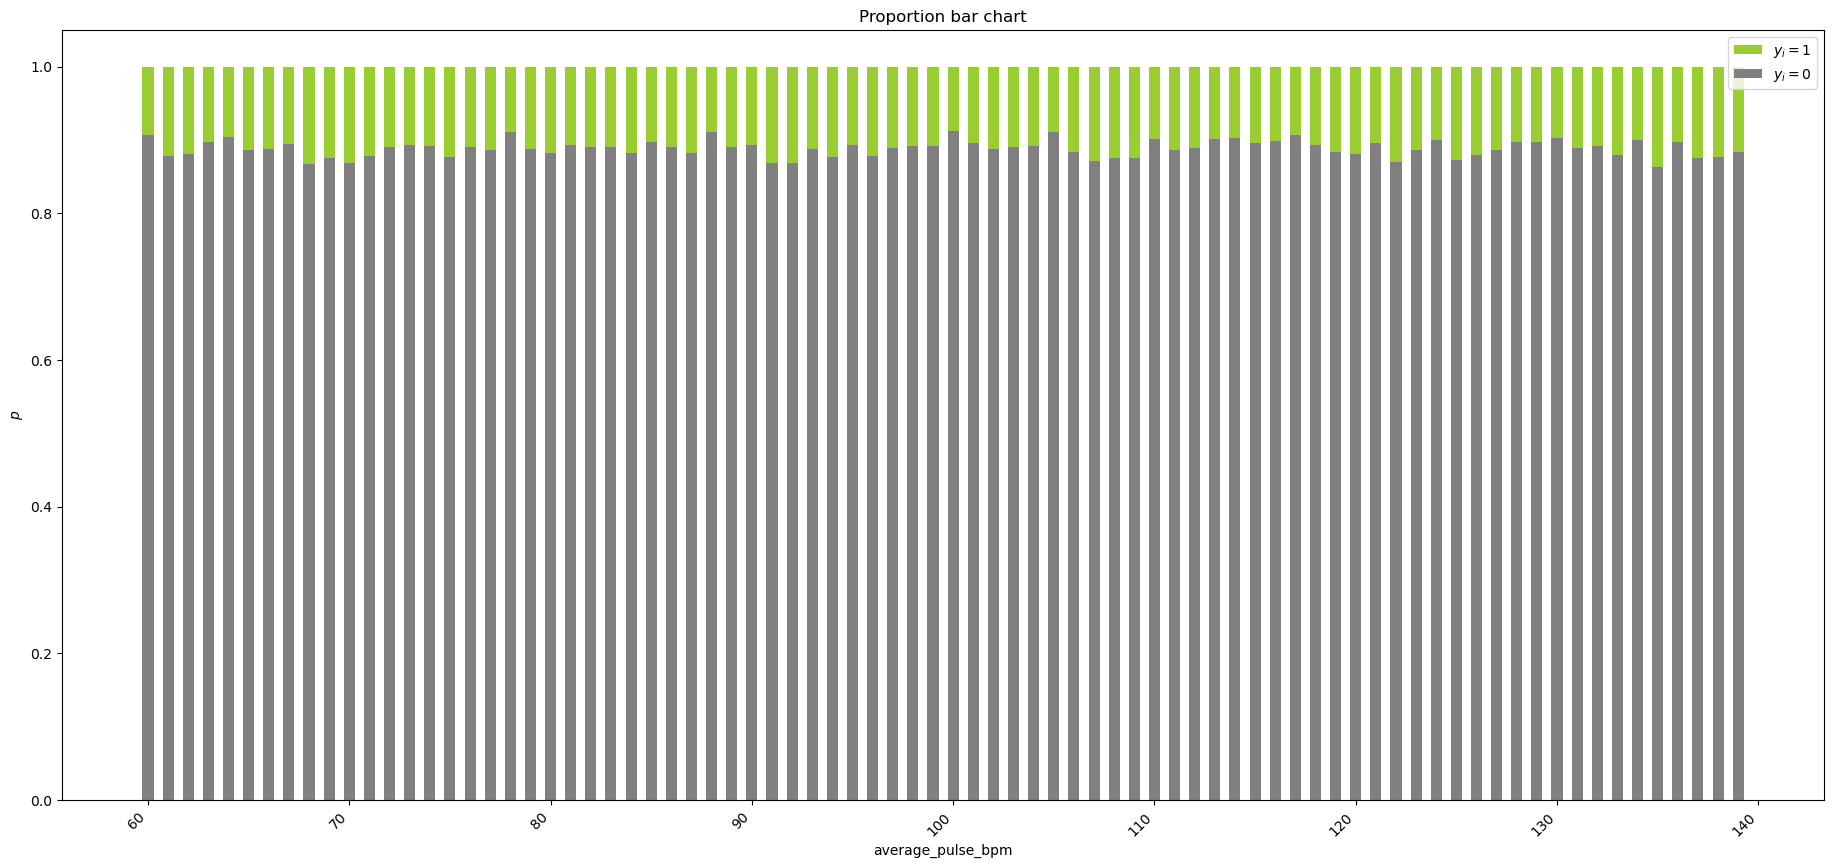

In [160]:
bar_charts_categorical(train, "average_pulse_bpm", "readmitted_binary")

# Train Test Split

In [161]:
X = train.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y_binary = train['readmitted_binary']

In [162]:
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X, y_binary,
                                                  test_size = 0.25, 
                                                  random_state = 0, 
                                                  stratify = y_binary, 
                                                  shuffle = True)

## Encoding categrical variables

In [163]:
enc1 = OrdinalEncoder() 

In [164]:
numerical_columns_train = pd.DataFrame(X_train_bin.select_dtypes(include=np.number))
categorical_columns_train = pd.DataFrame(X_train_bin.drop(numerical_columns_train.columns, axis=1))

numerical_columns_val = pd.DataFrame(X_val_bin.select_dtypes(include=np.number))
categorical_columns_val = pd.DataFrame(X_val_bin.drop(numerical_columns_val.columns, axis=1))

In [165]:
X_train_bin_encoded = enc1.fit_transform(categorical_columns_train)
X_train_bin_encoded = pd.DataFrame(X_train_bin_encoded, columns = categorical_columns_train.columns)
X_train_bin_encoded.set_index(X_train_bin.index, inplace=True)

X_train_bin_encoded = pd.concat([X_train_bin_encoded, numerical_columns_train], axis=1)

In [166]:
X_val_bin_encoded = enc1.transform(categorical_columns_val)
X_val_bin_encoded = pd.DataFrame(X_val_bin_encoded, columns=enc1.get_feature_names_out(categorical_columns_val.columns))
X_val_bin_encoded.set_index(X_val_bin.index, inplace=True)

X_val_bin_encoded = pd.concat([X_val_bin_encoded, numerical_columns_val], axis=1)

In [167]:
X_val_bin_encoded = enc1.transform(categorical_columns_val)
X_val_bin_encoded = pd.DataFrame(X_val_bin_encoded, columns = categorical_columns_val.columns)
X_val_bin_encoded.set_index(X_val_bin.index, inplace=True)

X_val_bin_encoded = pd.concat([X_val_bin_encoded, numerical_columns_val], axis=1)

## Imputing age

In [168]:
known_age = X_train_bin_encoded[X_train_bin_encoded['Midpoint_Age'].notnull()]
unknown_age = X_train_bin_encoded[X_train_bin_encoded['Midpoint_Age'].isnull()]

# Reset indices
known_age = known_age.reset_index(drop=True)
unknown_age = unknown_age.reset_index(drop=True)

# Create the training data for the model
X = known_age.drop(['Midpoint_Age'], axis=1)
y = known_age['Midpoint_Age']

# Fit the model
regr = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1)
regr.fit(X, y)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values using the original indices
X_train_bin_encoded.loc[X_train_bin_encoded['Midpoint_Age'].isnull(), 'Midpoint_Age'] = predicted_ages

In [169]:
known_age = X_val_bin_encoded[X_val_bin_encoded['Midpoint_Age'].notnull()]
unknown_age = X_val_bin_encoded[X_val_bin_encoded['Midpoint_Age'].isnull()]

# Reset indices
known_age = known_age.reset_index(drop=True)
unknown_age = unknown_age.reset_index(drop=True)

# Create the training data for the model
X = known_age.drop(['Midpoint_Age'], axis=1)
y = known_age['Midpoint_Age']

# Fit the model
regr = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1)
regr.fit(X, y)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values using the original indices
X_val_bin_encoded.loc[X_val_bin_encoded['Midpoint_Age'].isnull(), 'Midpoint_Age'] = predicted_ages

# Imbalanced_learning